In [55]:
# 사용할 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#한글 깨짐
plt.rc("font", family="Malgun Gothic")

In [56]:
# 파일 불러오기
test = pd.read_csv('data/test.csv', index_col='no')
train = pd.read_csv('data/train.csv', index_col='no')

## 예측할 값 : 개인 소득
- income : 50K 초과는 1, 50K 이하는 0 (소득)

### 컬럼 의미
- age - continuous.
- workclass(일 유형) : Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt(일련의 관측 결과를 바탕으로 인구조사국이 부여하는 개인의 가중치): continuous.
- education(교육수준) : Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num(교육수준 번호) : continuous.
- marital-status(결혼 상태) : Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation(직업) : Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship(가족관계) : Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race(인종) : White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex(성별) : Female, Male.
- capital-gain(자본 이익) : continuous.
- capital-loss(자본 손실) : continuous.
- hours-per-week(주당 근무 시간) : continuous.
- native-country(국적) : United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [57]:
# train 데이터 확인
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0


In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29305 entries, 1 to 29305
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29305 non-null  int64 
 1   workclass       29305 non-null  object
 2   fnlwgt          29305 non-null  int64 
 3   education       29305 non-null  object
 4   education-num   29305 non-null  int64 
 5   marital-status  29305 non-null  object
 6   occupation      29305 non-null  object
 7   relationship    29305 non-null  object
 8   race            29305 non-null  object
 9   sex             29305 non-null  object
 10  capital-gain    29305 non-null  int64 
 11  capital-loss    29305 non-null  int64 
 12  hours-per-week  29305 non-null  int64 
 13  native-country  29305 non-null  object
 14  income          29305 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.6+ MB


In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19537 entries, 29306 to 48842
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             19537 non-null  int64 
 1   workclass       19537 non-null  object
 2   fnlwgt          19537 non-null  int64 
 3   education       19537 non-null  object
 4   education-num   19537 non-null  int64 
 5   marital-status  19537 non-null  object
 6   occupation      19537 non-null  object
 7   relationship    19537 non-null  object
 8   race            19537 non-null  object
 9   sex             19537 non-null  object
 10  capital-gain    19537 non-null  int64 
 11  capital-loss    19537 non-null  int64 
 12  hours-per-week  19537 non-null  int64 
 13  native-country  19537 non-null  object
dtypes: int64(6), object(8)
memory usage: 2.2+ MB


- 범주형 데이터 8개와 수치형 데이터 7개로 이루어짐
- 결측치는 없음으로 확인

In [60]:
# 범주형 데이터 value값 확인
for i in train.columns:
    if train[i].dtype == 'object':
        cate = train[i].unique()
        print(f'{i}\n{cate}({len(cate)}개)')  
        print('--------------------')

workclass
[' Private' ' Self-emp-not-inc' ' Local-gov' ' ?' ' State-gov'
 ' Self-emp-inc' ' Federal-gov' ' Without-pay' ' Never-worked'](9개)
--------------------
education
[' 11th' ' Some-college' ' Bachelors' ' Assoc-voc' ' 9th' ' HS-grad'
 ' Masters' ' 5th-6th' ' Prof-school' ' 12th' ' 10th' ' Assoc-acdm'
 ' Doctorate' ' 7th-8th' ' 1st-4th' ' Preschool'](16개)
--------------------
marital-status
[' Divorced' ' Never-married' ' Married-civ-spouse' ' Separated'
 ' Married-spouse-absent' ' Widowed' ' Married-AF-spouse'](7개)
--------------------
occupation
[' Machine-op-inspct' ' Other-service' ' Handlers-cleaners'
 ' Tech-support' ' Transport-moving' ' Farming-fishing' ' Prof-specialty'
 ' Priv-house-serv' ' Adm-clerical' ' Protective-serv' ' Exec-managerial'
 ' ?' ' Craft-repair' ' Sales' ' Armed-Forces'](15개)
--------------------
relationship
[' Not-in-family' ' Husband' ' Unmarried' ' Other-relative' ' Own-child'
 ' Wife'](6개)
--------------------
race
[' White' ' Asian-Pac-Islander' 

- 값을 확인해 보니 앞에 공백이 있는것으로 확인됨
- 공백제거해주기
- NULL은 없는 것으로 보였으나 '?'로 들어가있음. 결측치 채워주기

#### value값 공백 제거

In [61]:
# 띄어쓰기 제거함
for i in train.columns : 
    if train[f'{i}'].dtype == 'object' :
        train[f'{i}'] = train[f'{i}'].apply(lambda x: x.replace(' ', ''))
    else :
        train[f'{i}'] = train[f'{i}']
        
for i in test.columns : 
    if test[f'{i}'].dtype == 'object' :
        test[f'{i}'] = test[f'{i}'].apply(lambda x: x.replace(' ', ''))
    else :
        test[f'{i}'] = test[f'{i}']

### 결측치 확인

In [62]:
train['workclass'].value_counts()

Private             20410
Self-emp-not-inc     2305
Local-gov            1868
?                    1663
State-gov            1201
Self-emp-inc          987
Federal-gov           854
Without-pay            12
Never-worked            5
Name: workclass, dtype: int64

In [63]:
train['native-country'].value_counts()

United-States                 26301
Mexico                          579
?                               495
Philippines                     178
Germany                         124
Puerto-Rico                     117
Canada                          111
El-Salvador                      96
Cuba                             94
India                            90
England                          75
South                            74
Jamaica                          68
China                            68
Dominican-Republic               61
Italy                            60
Japan                            54
Poland                           53
Columbia                         53
Guatemala                        51
Haiti                            51
Vietnam                          50
Portugal                         43
Taiwan                           39
Iran                             38
Nicaragua                        28
Peru                             25
Greece                      

In [64]:
train['occupation'].value_counts()

Prof-specialty       3724
Craft-repair         3632
Exec-managerial      3609
Adm-clerical         3440
Sales                3292
Other-service        2975
Machine-op-inspct    1811
?                    1668
Transport-moving     1393
Handlers-cleaners    1249
Farming-fishing       888
Tech-support          865
Protective-serv       603
Priv-house-serv       146
Armed-Forces           10
Name: occupation, dtype: int64

- 'workclass'와 'occupation'의 결측치 수(1663,1668)가 비슷하고 두 컬럼이 연관성 있으므로 두 결측치가 어떤 관계인지 확인

In [65]:
work_occ = train[(train['workclass'] == '?') & (train['occupation'] == '?')].shape[0]
work = train[train['workclass'] == '?'].shape[0]
print("workclass에서 '?'인 놈들은 occupation에서도 '?' 냐?",work_occ == work)

workclass에서 '?'인 놈들은 occupation에서도 '?' 냐? True


- workclass에서 never-worked가 5명임. 결측치 수 차이와 연관있다고 판단

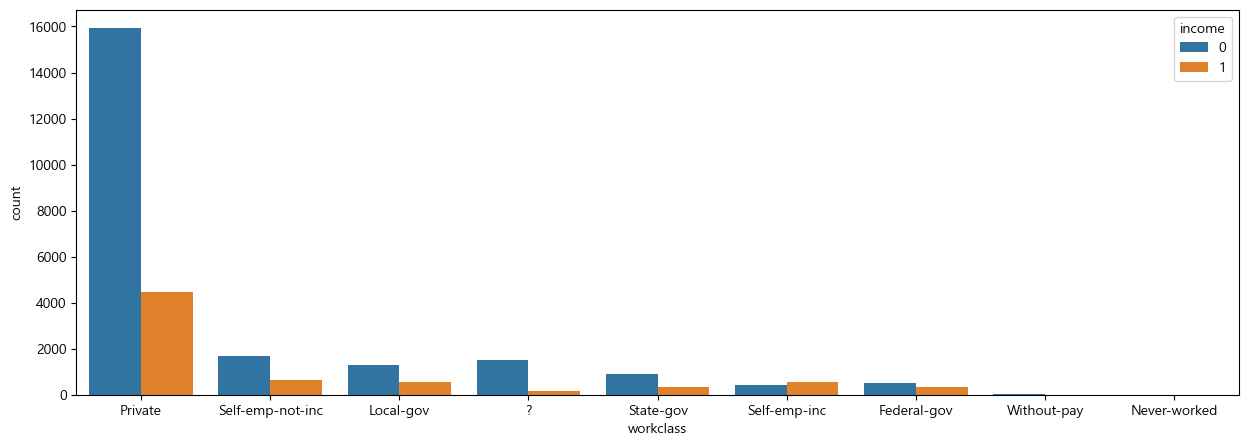

In [66]:
# workclass
plt.figure(figsize=(15,5))
sns.countplot(data=train, x='workclass', hue='income')
plt.show()

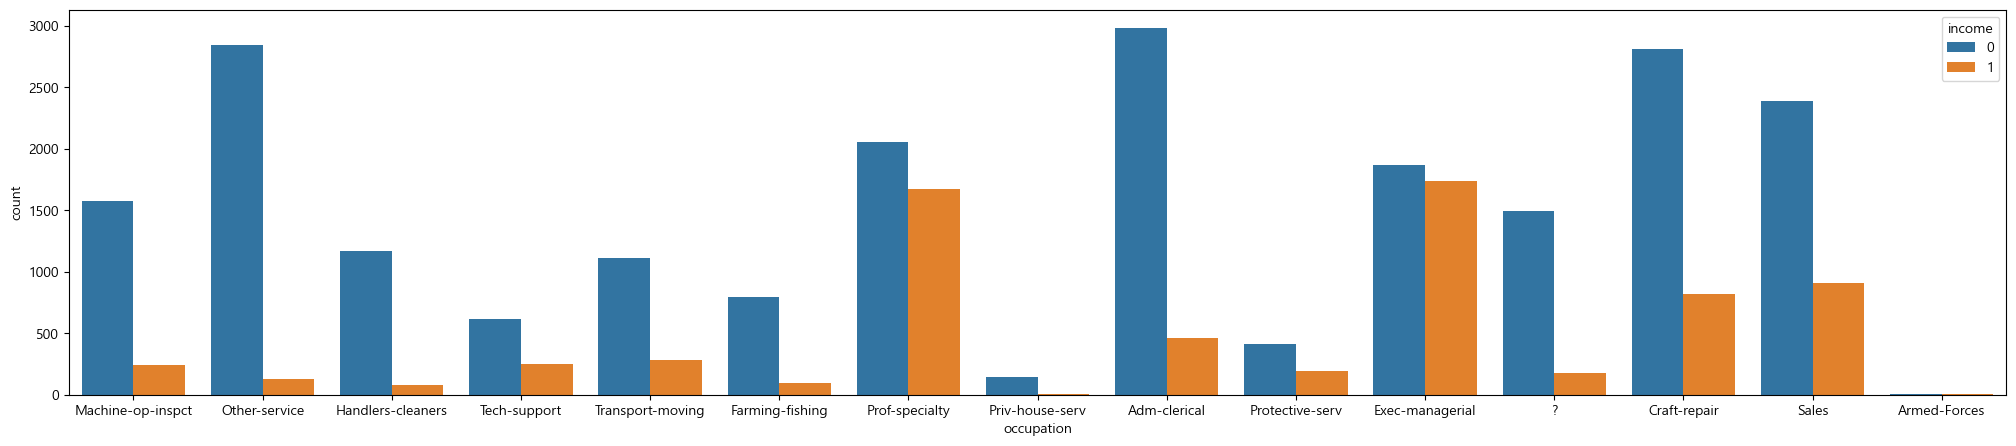

In [67]:
# occupation
plt.figure(figsize=(25,5))
sns.countplot(data=train, x='occupation', hue='income')
plt.show()

- ?인 애들의 income이 0인 비율이 가장 낮음
- workclass는 'never-worked'로 채워주기
- occupation은 다른 직업으로 채우기 어렵기 때문에 'not-occu'으로 바꾸기

In [68]:
title=['Private', 'Self-emp-not-inc', 'Local-gov', '?',
       'State-gov', 'Self-emp-inc','Federal-gov','Without-pay','Never-worked']
cover_title=['Private', 'Self-emp-not-inc', 'Local-gov', 'Never-worked',
       'State-gov', 'Self-emp-inc','Federal-gov','Without-pay','Never-worked']
title_dict = dict(zip(title, cover_title))
title_dict
train['workclass'] = train['workclass'].map(title_dict)
test['workclass'] =test['workclass'].map(title_dict)

In [69]:
title=['Machine-op-inspct', 'Other-service', 'Handlers-cleaners',
       'Tech-support', 'Transport-moving', 'Farming-fishing',
       'Prof-specialty', 'Priv-house-serv', 'Adm-clerical',
       'Protective-serv', 'Exec-managerial', '?', 'Craft-repair', 'Sales',
       'Armed-Forces']
cover_title=['Machine-op-inspct', 'Other-service', 'Handlers-cleaners',
       'Tech-support', 'Transport-moving', 'Farming-fishing',
       'Prof-specialty', 'Priv-house-serv', 'Adm-clerical',
       'Protective-serv', 'Exec-managerial', 'not-occu', 'Craft-repair', 'Sales',
       'Armed-Forces']
title_dict = dict(zip(title, cover_title))
title_dict
train['occupation'] = train['occupation'].map(title_dict)
test['occupation'] = test['occupation'].map(title_dict)

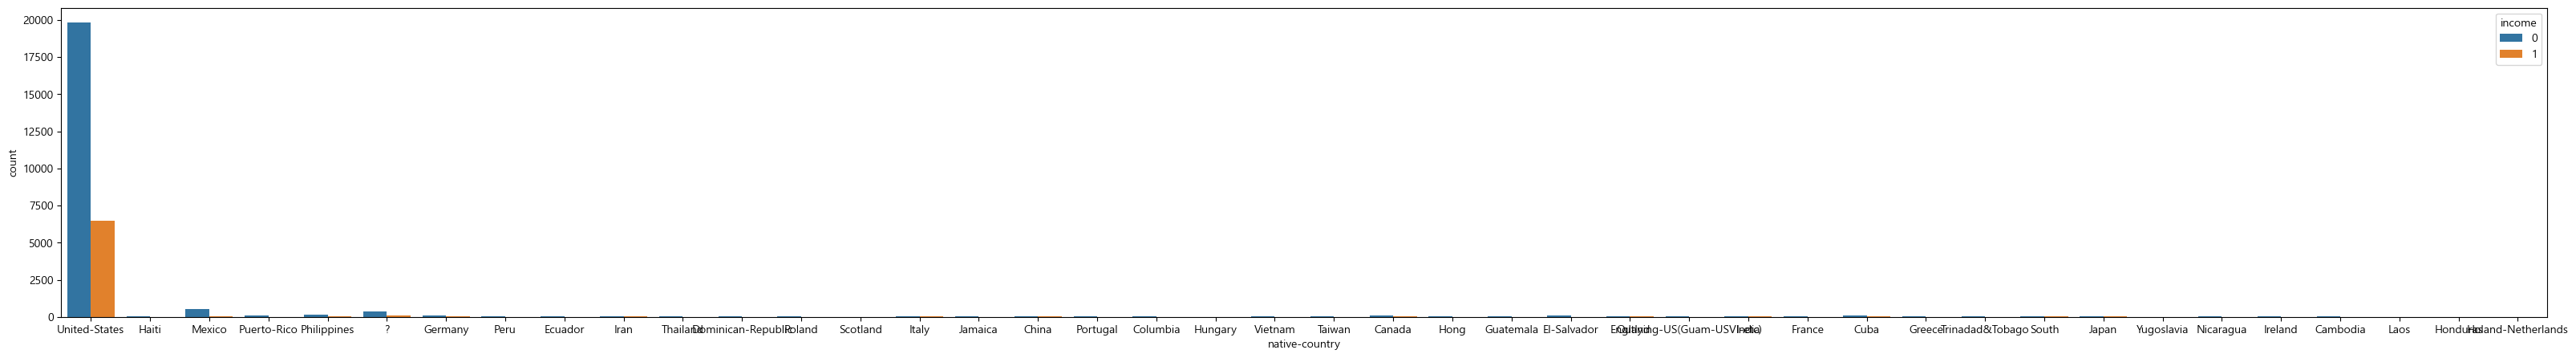

In [71]:
# native-country
plt.figure(figsize=(40,5))
sns.countplot(data=train, x='native-country', hue='income')
plt.show()

- native-country는 대부분이 us이고 ?값이 적으므로 최반값으로 채우기

In [17]:
title=['United-States', 'Haiti', 'Mexico', 'Puerto-Rico', 'Philippines',
       '?', 'Germany', 'Peru', 'Ecuador', 'Iran', 'Thailand',
       'Dominican-Republic', 'Poland', 'Scotland', 'Italy', 'Jamaica',
       'China', 'Portugal', 'Columbia', 'Hungary', 'Vietnam', 'Taiwan',
       'Canada', 'Hong', 'Guatemala', 'El-Salvador', 'England',
       'Outlying-US(Guam-USVI-etc)', 'India', 'France', 'Cuba', 'Greece',
       'Trinadad&Tobago', 'South', 'Japan', 'Yugoslavia', 'Nicaragua',
       'Ireland', 'Cambodia', 'Laos', 'Honduras', 'Holand-Netherlands']
cover_title=['United-States', 'Haiti', 'Mexico', 'Puerto-Rico', 'Philippines',
       'United-States', 'Germany', 'Peru', 'Ecuador', 'Iran', 'Thailand',
       'Dominican-Republic', 'Poland', 'Scotland', 'Italy', 'Jamaica',
       'China', 'Portugal', 'Columbia', 'Hungary', 'Vietnam', 'Taiwan',
       'Canada', 'Hong', 'Guatemala', 'El-Salvador', 'England',
       'Outlying-US(Guam-USVI-etc)', 'India', 'France', 'Cuba', 'Greece',
       'Trinadad&Tobago', 'South', 'Japan', 'Yugoslavia', 'Nicaragua',
       'Ireland', 'Cambodia', 'Laos', 'Honduras', 'Holand-Netherlands']
title_dict = dict(zip(title, cover_title))
title_dict
train['native-country'] = train['native-country'].map(title_dict)
test['native-country'] = test['native-country'].map(title_dict)

### 데이터 가공

In [18]:
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0


In [19]:
# education과 education-num은 동일한 내용
# education 드랍
train.drop('education',axis=1, inplace=True)
test.drop('education',axis=1, inplace=True)

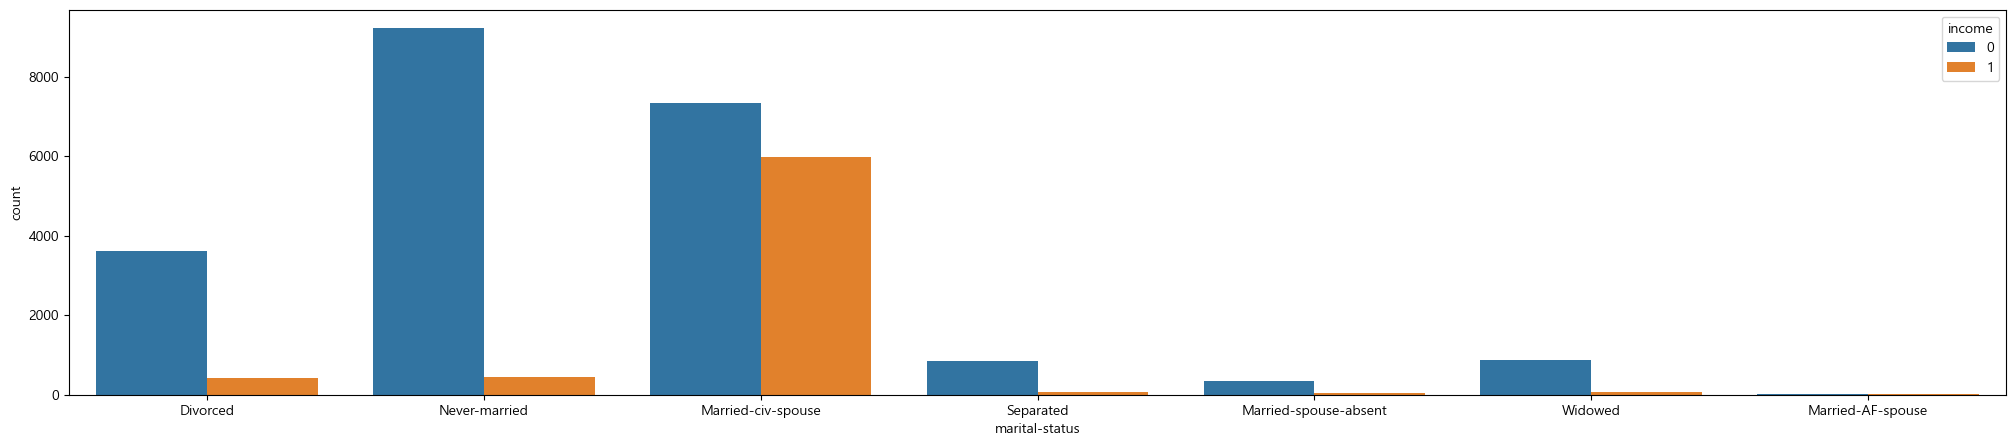

In [20]:
# marital-status
plt.figure(figsize=(25,5))
sns.countplot(data=train, x='marital-status', hue='income')
plt.show()

In [21]:
# 결혼했는지 안했는지만 판다하면 될것으로 판단
marital_status = ['Divorced', 'Never-married', 'Married-civ-spouse', 'Separated',
       'Married-spouse-absent', 'Widowed', 'Married-AF-spouse']
conver_marital_status = ['not-married', 'not-married', 'married', 'not-married', 'not-married', 'not-married','Married-AF-spouse']
marital_status_dict=dict(zip(marital_status, conver_marital_status))

train['marital-status']=train['marital-status'].map(marital_status_dict)
test['marital-status']=test['marital-status'].map(marital_status_dict)

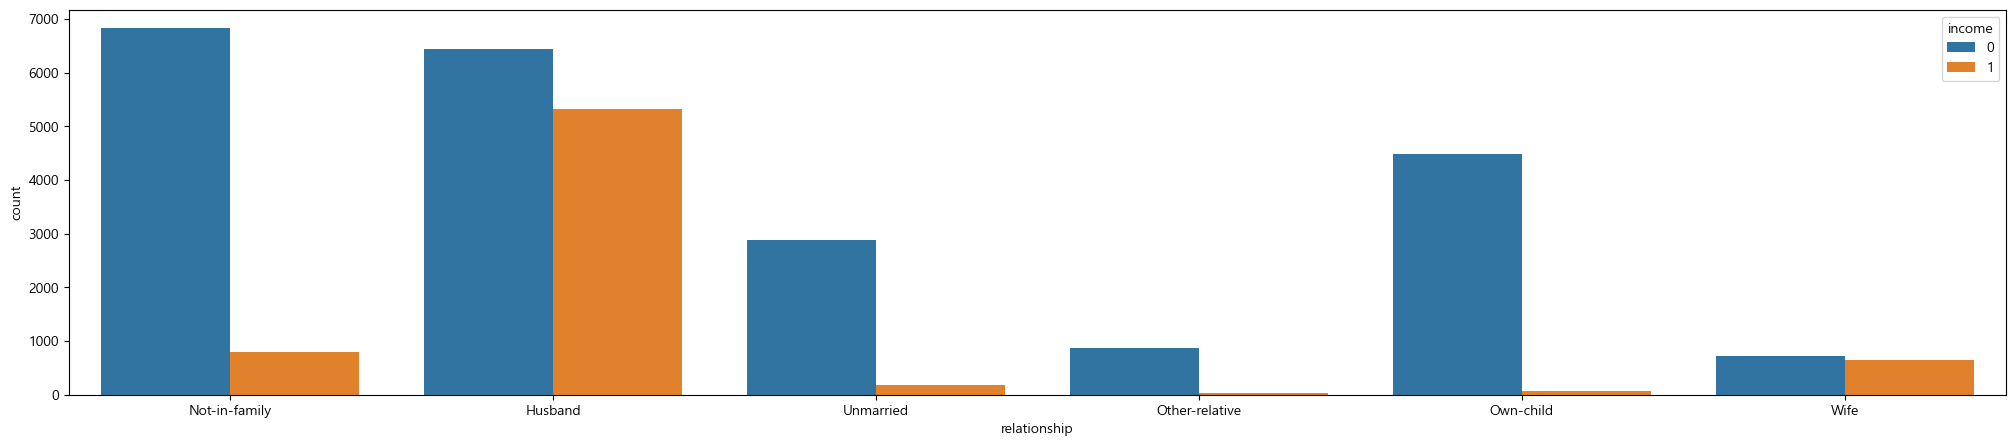

In [22]:
# relationship
plt.figure(figsize=(25,5))
sns.countplot(data=train, x='relationship', hue='income')
plt.show()

In [23]:
# relationship은 wife와 husband만 결혼했다고 합치고 나머지는 그대로 
title=['Not-in-family', 'Husband', 'Unmarried', 'Other-relative',
       'Own-child', 'Wife']
cover_title=['Not-in-family', 'Married', 'Unmarried', 'Other-relative',
       'Own-child', 'Married']
title_dict = dict(zip(title, cover_title))
train['relationship'] = train['relationship'].map(title_dict)
test['relationship'] = test['relationship'].map(title_dict)

- race, sex는 그대로 두기

In [24]:
# workclass는 같은 범주끼리 한번 더 그룹화
title=['Private', 'Self-emp-not-inc', 'Local-gov', 'State-gov',
       'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked']
cover_title=['Private', 'Self-emp', 'gov', 'gov',
       'Self-emp', 'gov', 'beggar', 'beggar']
title_dict = dict(zip(title, cover_title))
train['workclass'] = train['workclass'].map(title_dict)
test['workclass'] = test['workclass'].map(title_dict)

In [25]:
# cpaital부분은 범위가 광범위하기 때문에 로그 스케일 진행
# 학습에 더 적합하게 바꿈
skewed = ['capital-gain', 'capital-loss']
train2 = pd.DataFrame(data =train)
train2[skewed] = train[skewed].apply(lambda x: np.log(x + 1))
skewed = ['capital-gain', 'capital-loss']
test2 = pd.DataFrame(data =test)
test2[skewed] = test[skewed].apply(lambda x: np.log(x + 1))

- native-country value값이 많기 떄문에 그룹화하기
- 출신국가별 비율을 계산해서 나라이름대신 넣기

In [26]:
pt2 = train.pivot_table(values = 'income',
                       index = ['native-country'],
                       aggfunc = 'mean')

In [27]:
national = pt2.sort_values(by='income', ascending=False)
national

,income
native-country,
India,0.433333
Hungary,0.416667
Japan,0.388889
England,0.373333
Canada,0.369369
Iran,0.368421
Italy,0.366667
Greece,0.360000
Ireland,0.347826


In [28]:
native_country = national.index
conver_native_country =pt2['income']*10 # 이후에 스케일링을 진행할때를 위해 10곱해줌

native_country_dict = dict(zip(native_country, conver_native_country))
native_country_dict

train['native-country']=train['native-country'].map(native_country_dict)
test['native-country']=test['native-country'].map(native_country_dict)

- age,education-num, hours-per-weak 등 수치형 데이터는 카데고리화

In [29]:
"""# 교육수준은 크게 저,중,고로 나눌 수 있는데, 중간이 많기 때문에 그냥 4분할 함
bins = [0,4,8,12,16] # 범위지정
labels = ['e1', 'e2', 'e3', 'e4'] # 라벨지정
train['education-num'] = pd.cut(train['education-num'], bins=bins, labels = labels)
test['education-num'] = pd.cut(test['education-num'], bins=bins, labels=labels)"""

"# 교육수준은 크게 저,중,고로 나눌 수 있는데, 중간이 많기 때문에 그냥 4분할 함\nbins = [0,4,8,12,16] # 범위지정\nlabels = ['e1', 'e2', 'e3', 'e4'] # 라벨지정\ntrain['education-num'] = pd.cut(train['education-num'], bins=bins, labels = labels)\ntest['education-num'] = pd.cut(test['education-num'], bins=bins, labels=labels)"

In [30]:
"""# 나이는 처음엔 3분할 했으나 너무 크게 묶이는 거 같아 20대 별로 재분할
bins = [i for i in range(0, 101,20)]
labels = ['age' + str(i) for i in range(0, 100,20)] # 라벨지정
train['age'] = pd.cut(train['age'], bins=bins, labels = labels)
test['age'] = pd.cut(test['age'], bins=bins, labels=labels)"""

"# 나이는 처음엔 3분할 했으나 너무 크게 묶이는 거 같아 20대 별로 재분할\nbins = [i for i in range(0, 101,20)]\nlabels = ['age' + str(i) for i in range(0, 100,20)] # 라벨지정\ntrain['age'] = pd.cut(train['age'], bins=bins, labels = labels)\ntest['age'] = pd.cut(test['age'], bins=bins, labels=labels)"

- 카데고리화 할수록 성능이 안좋음..스케일링 하니까 그냥 사용

- fnlwgt는 뭔지 잘 모르겠어서 지우고, 안지우고 두경우 다 확인하기

In [31]:
train = train.drop('fnlwgt',axis=1)
test= test.drop('fnlwgt',axis=1)

### 훈련 시작

In [32]:
# 문제/답 분리
X_train = train.loc[:,:'native-country']
y_train = train['income']

In [33]:
X_train = pd.get_dummies(X_train) # 0과 1로만 이루어진 열을 생성
X_test = pd.get_dummies(test)

In [34]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
mm_transform_X_train = mm_scaler.transform(X_train)
X_train = pd.DataFrame(mm_transform_X_train, columns=X_train.columns)
mm_transform_X_test = mm_scaler.transform(X_test)
X_test = pd.DataFrame(mm_transform_X_test, columns=X_test.columns)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaler.fit(X_train)
st_transform_X_train =scaler.transform(X_train)
X_train = pd.DataFrame(st_transform_X_train, columns=X_train.columns)
st_transform_X_test =scaler.transform(X_test)
X_test = pd.DataFrame(st_transform_X_test, columns=X_test.columns)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
# knn,tree, rf 등 성능이 존나 구리고 adaboost모델이 그나마 괜찮음
# 다른 부스팅 모델없나 서치 후 여러 모델 불러옴
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [37]:
# 그리드서치 바탕으로 하이퍼파라미터 조정
"""ada_model = AdaBoostClassifier()
ada_param = {'n_estimators' : [50,150,250],
             'learning_rate' : [0.5,1]
            }
ada_grid = GridSearchCV(ada_model,ada_param,cv = 3)
ada_grid.fit(X_train,y_train)
print('최고 평균 정확도 수치: {:.4f}'.format(ada_grid.best_score_))
print('최적 하이퍼 파라미터: ', ada_grid.best_params_)
# 그리드서치 바탕으로 하이퍼파라미터 조정
final_ada_model = ada_grid.best_estimator_"""
final_Ada_model = AdaBoostClassifier(learning_rate= 1,
                                    n_estimators = 250)
final_Ada_model.fit(X_train,y_train)
result = cross_val_score(final_Ada_model,
                          X_train,
                          y_train,
                          cv = 5)
result.mean()

0.8647671045896604

In [38]:
# 얘는 그리드 서치하다가 컴터가 맛이가려하길래 걍 여기저기서 본 것으로 긁어와서 정함
final_lgbm_model = LGBMClassifier(random_state=200, n_jobs=-1, reg_alpha=0.9, reg_lambda=0.2, n_estimators=200)
final_lgbm_model.fit(X_train, y_train)
result = cross_val_score(final_lgbm_model,
                          X_train,
                          y_train,
                          cv = 5)
result.mean()

[LightGBM] [Info] Number of positive: 7045, number of negative: 22260
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 478
[LightGBM] [Info] Number of data points in the train set: 29305, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 461
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 38
[LightGBM] [Info] [bin

0.8684866063811636

In [40]:
"""cb_model = CatBoostClassifier()
cb_param = {"depth" : [4,6,8,10], #트리의 깊이
          "iterations" : [250,100,500,1000], #학습 반복횟수
          "learning_rate" : [0.001,0.01,0.1,0.2,0.3], #학습률
          "l2_leaf_reg" : [2,5,10,20,30], #L2규제 하이퍼파라미터
          "border_count" : [254]
          }
cb_grid = GridSearchCV (cb_model, cb_param, scoring ='accuracy', cv = 3, refit=True, n_jobs=1, verbose=2)
# scoring - 모델 성능을 평가하는데 사용할 지표(정확도)
# refit - 최적 하이퍼파라미터를 찾은 후 모델을 재학습
cb_grid.fit(X_train,y_train)
print('최고 평균 정확도 수치: {:.4f}'.format(cat_grid.best_score_))
print('최적 하이퍼 파라미터: ', cb_grid.best_params_)"""
# 얜 성능이 더 줄어들길래 다 기본값으로 
final_cb_model = CatBoostClassifier()
final_cb_model.fit(X_train, y_train)
result = cross_val_score(final_cb_model,
                          X_train,
                          y_train,
                          cv = 5)
result.mean()

Learning rate set to 0.043583
0:	learn: 0.6474526	total: 150ms	remaining: 2m 29s
1:	learn: 0.6058531	total: 156ms	remaining: 1m 17s
2:	learn: 0.5717718	total: 163ms	remaining: 54s
3:	learn: 0.5445671	total: 169ms	remaining: 42.1s
4:	learn: 0.5196342	total: 176ms	remaining: 35s
5:	learn: 0.4977635	total: 182ms	remaining: 30.2s
6:	learn: 0.4782776	total: 192ms	remaining: 27.2s
7:	learn: 0.4618423	total: 201ms	remaining: 24.9s
8:	learn: 0.4464763	total: 208ms	remaining: 22.9s
9:	learn: 0.4323167	total: 217ms	remaining: 21.4s
10:	learn: 0.4210016	total: 224ms	remaining: 20.1s
11:	learn: 0.4102655	total: 232ms	remaining: 19.1s
12:	learn: 0.4007489	total: 238ms	remaining: 18.1s
13:	learn: 0.3919772	total: 245ms	remaining: 17.2s
14:	learn: 0.3849784	total: 252ms	remaining: 16.5s
15:	learn: 0.3780716	total: 259ms	remaining: 15.9s
16:	learn: 0.3727079	total: 265ms	remaining: 15.3s
17:	learn: 0.3678561	total: 271ms	remaining: 14.8s
18:	learn: 0.3629185	total: 278ms	remaining: 14.3s
19:	learn: 0.

163:	learn: 0.2839858	total: 1.47s	remaining: 7.51s
164:	learn: 0.2838872	total: 1.48s	remaining: 7.5s
165:	learn: 0.2838211	total: 1.49s	remaining: 7.49s
166:	learn: 0.2837121	total: 1.5s	remaining: 7.5s
167:	learn: 0.2835482	total: 1.51s	remaining: 7.48s
168:	learn: 0.2834682	total: 1.52s	remaining: 7.46s
169:	learn: 0.2833967	total: 1.52s	remaining: 7.44s
170:	learn: 0.2833277	total: 1.53s	remaining: 7.42s
171:	learn: 0.2832455	total: 1.54s	remaining: 7.39s
172:	learn: 0.2831988	total: 1.54s	remaining: 7.37s
173:	learn: 0.2831340	total: 1.55s	remaining: 7.37s
174:	learn: 0.2830335	total: 1.56s	remaining: 7.35s
175:	learn: 0.2829584	total: 1.57s	remaining: 7.33s
176:	learn: 0.2828821	total: 1.57s	remaining: 7.32s
177:	learn: 0.2827753	total: 1.58s	remaining: 7.3s
178:	learn: 0.2824702	total: 1.59s	remaining: 7.28s
179:	learn: 0.2823289	total: 1.59s	remaining: 7.27s
180:	learn: 0.2822342	total: 1.6s	remaining: 7.25s
181:	learn: 0.2821836	total: 1.61s	remaining: 7.23s
182:	learn: 0.282

339:	learn: 0.2687849	total: 2.72s	remaining: 5.28s
340:	learn: 0.2687203	total: 2.72s	remaining: 5.26s
341:	learn: 0.2686444	total: 2.73s	remaining: 5.26s
342:	learn: 0.2683925	total: 2.74s	remaining: 5.25s
343:	learn: 0.2683590	total: 2.75s	remaining: 5.24s
344:	learn: 0.2682888	total: 2.75s	remaining: 5.23s
345:	learn: 0.2682378	total: 2.76s	remaining: 5.22s
346:	learn: 0.2682093	total: 2.77s	remaining: 5.21s
347:	learn: 0.2681610	total: 2.77s	remaining: 5.2s
348:	learn: 0.2680911	total: 2.78s	remaining: 5.18s
349:	learn: 0.2680467	total: 2.79s	remaining: 5.17s
350:	learn: 0.2680034	total: 2.79s	remaining: 5.17s
351:	learn: 0.2679357	total: 2.8s	remaining: 5.16s
352:	learn: 0.2678749	total: 2.81s	remaining: 5.15s
353:	learn: 0.2678424	total: 2.82s	remaining: 5.14s
354:	learn: 0.2677721	total: 2.82s	remaining: 5.13s
355:	learn: 0.2677387	total: 2.83s	remaining: 5.12s
356:	learn: 0.2676901	total: 2.84s	remaining: 5.11s
357:	learn: 0.2674718	total: 2.85s	remaining: 5.1s
358:	learn: 0.2

516:	learn: 0.2594266	total: 3.94s	remaining: 3.68s
517:	learn: 0.2593870	total: 3.94s	remaining: 3.67s
518:	learn: 0.2593678	total: 3.95s	remaining: 3.66s
519:	learn: 0.2593268	total: 3.96s	remaining: 3.66s
520:	learn: 0.2592732	total: 3.97s	remaining: 3.65s
521:	learn: 0.2592391	total: 3.98s	remaining: 3.64s
522:	learn: 0.2591977	total: 3.98s	remaining: 3.63s
523:	learn: 0.2590918	total: 3.99s	remaining: 3.62s
524:	learn: 0.2590548	total: 3.99s	remaining: 3.61s
525:	learn: 0.2590124	total: 4s	remaining: 3.61s
526:	learn: 0.2589671	total: 4.01s	remaining: 3.6s
527:	learn: 0.2589329	total: 4.02s	remaining: 3.59s
528:	learn: 0.2588901	total: 4.02s	remaining: 3.58s
529:	learn: 0.2588465	total: 4.03s	remaining: 3.57s
530:	learn: 0.2588201	total: 4.03s	remaining: 3.56s
531:	learn: 0.2587690	total: 4.04s	remaining: 3.55s
532:	learn: 0.2587142	total: 4.05s	remaining: 3.55s
533:	learn: 0.2586917	total: 4.05s	remaining: 3.54s
534:	learn: 0.2586477	total: 4.06s	remaining: 3.53s
535:	learn: 0.25

688:	learn: 0.2525564	total: 5.15s	remaining: 2.33s
689:	learn: 0.2525084	total: 5.16s	remaining: 2.32s
690:	learn: 0.2524724	total: 5.17s	remaining: 2.31s
691:	learn: 0.2524496	total: 5.17s	remaining: 2.3s
692:	learn: 0.2524166	total: 5.18s	remaining: 2.29s
693:	learn: 0.2523572	total: 5.19s	remaining: 2.29s
694:	learn: 0.2523376	total: 5.19s	remaining: 2.28s
695:	learn: 0.2523043	total: 5.2s	remaining: 2.27s
696:	learn: 0.2522510	total: 5.21s	remaining: 2.26s
697:	learn: 0.2522239	total: 5.21s	remaining: 2.25s
698:	learn: 0.2521937	total: 5.22s	remaining: 2.25s
699:	learn: 0.2521595	total: 5.22s	remaining: 2.24s
700:	learn: 0.2521184	total: 5.23s	remaining: 2.23s
701:	learn: 0.2520639	total: 5.24s	remaining: 2.22s
702:	learn: 0.2520245	total: 5.25s	remaining: 2.22s
703:	learn: 0.2520086	total: 5.25s	remaining: 2.21s
704:	learn: 0.2519676	total: 5.26s	remaining: 2.2s
705:	learn: 0.2519375	total: 5.26s	remaining: 2.19s
706:	learn: 0.2519074	total: 5.27s	remaining: 2.18s
707:	learn: 0.2

869:	learn: 0.2467330	total: 6.4s	remaining: 956ms
870:	learn: 0.2467075	total: 6.41s	remaining: 949ms
871:	learn: 0.2466888	total: 6.42s	remaining: 942ms
872:	learn: 0.2466601	total: 6.42s	remaining: 934ms
873:	learn: 0.2466356	total: 6.43s	remaining: 927ms
874:	learn: 0.2466051	total: 6.44s	remaining: 920ms
875:	learn: 0.2465639	total: 6.44s	remaining: 912ms
876:	learn: 0.2465446	total: 6.45s	remaining: 905ms
877:	learn: 0.2465113	total: 6.46s	remaining: 897ms
878:	learn: 0.2464770	total: 6.46s	remaining: 890ms
879:	learn: 0.2464569	total: 6.47s	remaining: 882ms
880:	learn: 0.2464319	total: 6.48s	remaining: 875ms
881:	learn: 0.2463967	total: 6.48s	remaining: 867ms
882:	learn: 0.2463711	total: 6.49s	remaining: 860ms
883:	learn: 0.2463264	total: 6.5s	remaining: 853ms
884:	learn: 0.2462710	total: 6.51s	remaining: 846ms
885:	learn: 0.2462425	total: 6.51s	remaining: 838ms
886:	learn: 0.2461906	total: 6.52s	remaining: 831ms
887:	learn: 0.2461679	total: 6.53s	remaining: 823ms
888:	learn: 0.

49:	learn: 0.3156225	total: 330ms	remaining: 6.26s
50:	learn: 0.3149237	total: 338ms	remaining: 6.28s
51:	learn: 0.3142459	total: 347ms	remaining: 6.32s
52:	learn: 0.3136256	total: 353ms	remaining: 6.31s
53:	learn: 0.3129276	total: 360ms	remaining: 6.3s
54:	learn: 0.3120348	total: 368ms	remaining: 6.32s
55:	learn: 0.3114338	total: 376ms	remaining: 6.34s
56:	learn: 0.3108968	total: 383ms	remaining: 6.33s
57:	learn: 0.3103029	total: 391ms	remaining: 6.35s
58:	learn: 0.3099517	total: 398ms	remaining: 6.35s
59:	learn: 0.3093332	total: 406ms	remaining: 6.36s
60:	learn: 0.3087256	total: 415ms	remaining: 6.39s
61:	learn: 0.3082300	total: 422ms	remaining: 6.39s
62:	learn: 0.3078294	total: 433ms	remaining: 6.44s
63:	learn: 0.3074777	total: 442ms	remaining: 6.46s
64:	learn: 0.3070274	total: 449ms	remaining: 6.46s
65:	learn: 0.3065068	total: 457ms	remaining: 6.46s
66:	learn: 0.3062851	total: 463ms	remaining: 6.45s
67:	learn: 0.3059184	total: 469ms	remaining: 6.43s
68:	learn: 0.3054654	total: 475m

233:	learn: 0.2774532	total: 1.58s	remaining: 5.18s
234:	learn: 0.2773636	total: 1.59s	remaining: 5.17s
235:	learn: 0.2772798	total: 1.6s	remaining: 5.17s
236:	learn: 0.2772228	total: 1.6s	remaining: 5.17s
237:	learn: 0.2771472	total: 1.61s	remaining: 5.16s
238:	learn: 0.2770471	total: 1.62s	remaining: 5.15s
239:	learn: 0.2769892	total: 1.62s	remaining: 5.14s
240:	learn: 0.2769233	total: 1.63s	remaining: 5.13s
241:	learn: 0.2767898	total: 1.64s	remaining: 5.13s
242:	learn: 0.2767100	total: 1.65s	remaining: 5.13s
243:	learn: 0.2766105	total: 1.65s	remaining: 5.12s
244:	learn: 0.2765549	total: 1.66s	remaining: 5.11s
245:	learn: 0.2764966	total: 1.66s	remaining: 5.1s
246:	learn: 0.2764074	total: 1.67s	remaining: 5.09s
247:	learn: 0.2763456	total: 1.68s	remaining: 5.08s
248:	learn: 0.2762656	total: 1.68s	remaining: 5.07s
249:	learn: 0.2761709	total: 1.69s	remaining: 5.06s
250:	learn: 0.2761195	total: 1.7s	remaining: 5.06s
251:	learn: 0.2760552	total: 1.7s	remaining: 5.05s
252:	learn: 0.275

415:	learn: 0.2627361	total: 2.8s	remaining: 3.93s
416:	learn: 0.2626749	total: 2.81s	remaining: 3.92s
417:	learn: 0.2626224	total: 2.81s	remaining: 3.92s
418:	learn: 0.2625711	total: 2.82s	remaining: 3.91s
419:	learn: 0.2624814	total: 2.83s	remaining: 3.9s
420:	learn: 0.2623970	total: 2.83s	remaining: 3.9s
421:	learn: 0.2623391	total: 2.84s	remaining: 3.89s
422:	learn: 0.2622916	total: 2.84s	remaining: 3.88s
423:	learn: 0.2622545	total: 2.85s	remaining: 3.87s
424:	learn: 0.2622069	total: 2.86s	remaining: 3.87s
425:	learn: 0.2621450	total: 2.86s	remaining: 3.86s
426:	learn: 0.2621086	total: 2.87s	remaining: 3.85s
427:	learn: 0.2620479	total: 2.88s	remaining: 3.85s
428:	learn: 0.2619519	total: 2.88s	remaining: 3.84s
429:	learn: 0.2618889	total: 2.89s	remaining: 3.83s
430:	learn: 0.2618321	total: 2.9s	remaining: 3.83s
431:	learn: 0.2617772	total: 2.9s	remaining: 3.82s
432:	learn: 0.2617304	total: 2.91s	remaining: 3.81s
433:	learn: 0.2617006	total: 2.92s	remaining: 3.8s
434:	learn: 0.2616

594:	learn: 0.2536416	total: 4.06s	remaining: 2.76s
595:	learn: 0.2536212	total: 4.06s	remaining: 2.75s
596:	learn: 0.2535870	total: 4.07s	remaining: 2.75s
597:	learn: 0.2535323	total: 4.08s	remaining: 2.75s
598:	learn: 0.2534994	total: 4.09s	remaining: 2.74s
599:	learn: 0.2534648	total: 4.1s	remaining: 2.73s
600:	learn: 0.2534622	total: 4.11s	remaining: 2.73s
601:	learn: 0.2534222	total: 4.12s	remaining: 2.72s
602:	learn: 0.2533785	total: 4.12s	remaining: 2.71s
603:	learn: 0.2533235	total: 4.13s	remaining: 2.71s
604:	learn: 0.2532774	total: 4.13s	remaining: 2.7s
605:	learn: 0.2532488	total: 4.14s	remaining: 2.69s
606:	learn: 0.2532053	total: 4.15s	remaining: 2.69s
607:	learn: 0.2531710	total: 4.16s	remaining: 2.68s
608:	learn: 0.2531430	total: 4.16s	remaining: 2.67s
609:	learn: 0.2531084	total: 4.17s	remaining: 2.67s
610:	learn: 0.2530742	total: 4.18s	remaining: 2.66s
611:	learn: 0.2530088	total: 4.19s	remaining: 2.66s
612:	learn: 0.2529020	total: 4.2s	remaining: 2.65s
613:	learn: 0.2

778:	learn: 0.2464926	total: 5.29s	remaining: 1.5s
779:	learn: 0.2464806	total: 5.29s	remaining: 1.49s
780:	learn: 0.2464611	total: 5.3s	remaining: 1.49s
781:	learn: 0.2464369	total: 5.3s	remaining: 1.48s
782:	learn: 0.2463999	total: 5.31s	remaining: 1.47s
783:	learn: 0.2463638	total: 5.32s	remaining: 1.46s
784:	learn: 0.2463272	total: 5.32s	remaining: 1.46s
785:	learn: 0.2462967	total: 5.33s	remaining: 1.45s
786:	learn: 0.2461995	total: 5.34s	remaining: 1.44s
787:	learn: 0.2461666	total: 5.34s	remaining: 1.44s
788:	learn: 0.2461517	total: 5.35s	remaining: 1.43s
789:	learn: 0.2460889	total: 5.36s	remaining: 1.42s
790:	learn: 0.2460582	total: 5.36s	remaining: 1.42s
791:	learn: 0.2460212	total: 5.37s	remaining: 1.41s
792:	learn: 0.2459933	total: 5.38s	remaining: 1.4s
793:	learn: 0.2459629	total: 5.38s	remaining: 1.4s
794:	learn: 0.2459252	total: 5.39s	remaining: 1.39s
795:	learn: 0.2458961	total: 5.39s	remaining: 1.38s
796:	learn: 0.2458774	total: 5.4s	remaining: 1.38s
797:	learn: 0.2458

953:	learn: 0.2404777	total: 6.49s	remaining: 313ms
954:	learn: 0.2404305	total: 6.5s	remaining: 306ms
955:	learn: 0.2403986	total: 6.5s	remaining: 299ms
956:	learn: 0.2403984	total: 6.51s	remaining: 293ms
957:	learn: 0.2403760	total: 6.52s	remaining: 286ms
958:	learn: 0.2403622	total: 6.52s	remaining: 279ms
959:	learn: 0.2403381	total: 6.53s	remaining: 272ms
960:	learn: 0.2403155	total: 6.54s	remaining: 265ms
961:	learn: 0.2402815	total: 6.54s	remaining: 258ms
962:	learn: 0.2402257	total: 6.55s	remaining: 252ms
963:	learn: 0.2401733	total: 6.56s	remaining: 245ms
964:	learn: 0.2401720	total: 6.57s	remaining: 238ms
965:	learn: 0.2401535	total: 6.57s	remaining: 231ms
966:	learn: 0.2401115	total: 6.58s	remaining: 225ms
967:	learn: 0.2401048	total: 6.59s	remaining: 218ms
968:	learn: 0.2400931	total: 6.59s	remaining: 211ms
969:	learn: 0.2400575	total: 6.6s	remaining: 204ms
970:	learn: 0.2400231	total: 6.61s	remaining: 197ms
971:	learn: 0.2400061	total: 6.61s	remaining: 190ms
972:	learn: 0.2

124:	learn: 0.2948681	total: 880ms	remaining: 6.16s
125:	learn: 0.2946776	total: 886ms	remaining: 6.15s
126:	learn: 0.2942847	total: 893ms	remaining: 6.14s
127:	learn: 0.2941373	total: 899ms	remaining: 6.13s
128:	learn: 0.2939483	total: 905ms	remaining: 6.11s
129:	learn: 0.2937516	total: 912ms	remaining: 6.1s
130:	learn: 0.2936144	total: 918ms	remaining: 6.09s
131:	learn: 0.2935121	total: 923ms	remaining: 6.07s
132:	learn: 0.2934027	total: 930ms	remaining: 6.06s
133:	learn: 0.2932610	total: 936ms	remaining: 6.05s
134:	learn: 0.2931163	total: 942ms	remaining: 6.04s
135:	learn: 0.2929597	total: 948ms	remaining: 6.02s
136:	learn: 0.2927740	total: 954ms	remaining: 6.01s
137:	learn: 0.2926641	total: 960ms	remaining: 6s
138:	learn: 0.2925420	total: 966ms	remaining: 5.98s
139:	learn: 0.2924426	total: 973ms	remaining: 5.98s
140:	learn: 0.2923403	total: 979ms	remaining: 5.96s
141:	learn: 0.2921598	total: 985ms	remaining: 5.95s
142:	learn: 0.2920733	total: 991ms	remaining: 5.94s
143:	learn: 0.29

305:	learn: 0.2751699	total: 2.1s	remaining: 4.76s
306:	learn: 0.2751012	total: 2.11s	remaining: 4.76s
307:	learn: 0.2750057	total: 2.12s	remaining: 4.75s
308:	learn: 0.2747767	total: 2.12s	remaining: 4.75s
309:	learn: 0.2747145	total: 2.13s	remaining: 4.74s
310:	learn: 0.2746464	total: 2.14s	remaining: 4.73s
311:	learn: 0.2745807	total: 2.14s	remaining: 4.73s
312:	learn: 0.2744521	total: 2.15s	remaining: 4.72s
313:	learn: 0.2744124	total: 2.15s	remaining: 4.71s
314:	learn: 0.2743380	total: 2.16s	remaining: 4.7s
315:	learn: 0.2740857	total: 2.17s	remaining: 4.7s
316:	learn: 0.2738541	total: 2.18s	remaining: 4.69s
317:	learn: 0.2737981	total: 2.18s	remaining: 4.68s
318:	learn: 0.2737202	total: 2.19s	remaining: 4.68s
319:	learn: 0.2736413	total: 2.2s	remaining: 4.67s
320:	learn: 0.2735579	total: 2.21s	remaining: 4.67s
321:	learn: 0.2734853	total: 2.21s	remaining: 4.66s
322:	learn: 0.2734220	total: 2.22s	remaining: 4.65s
323:	learn: 0.2733752	total: 2.23s	remaining: 4.65s
324:	learn: 0.27

478:	learn: 0.2634760	total: 3.35s	remaining: 3.64s
479:	learn: 0.2634324	total: 3.35s	remaining: 3.63s
480:	learn: 0.2633931	total: 3.36s	remaining: 3.63s
481:	learn: 0.2633426	total: 3.37s	remaining: 3.62s
482:	learn: 0.2632930	total: 3.37s	remaining: 3.61s
483:	learn: 0.2632270	total: 3.38s	remaining: 3.6s
484:	learn: 0.2631809	total: 3.39s	remaining: 3.6s
485:	learn: 0.2630515	total: 3.39s	remaining: 3.59s
486:	learn: 0.2630114	total: 3.4s	remaining: 3.58s
487:	learn: 0.2629852	total: 3.4s	remaining: 3.57s
488:	learn: 0.2629473	total: 3.41s	remaining: 3.56s
489:	learn: 0.2629214	total: 3.42s	remaining: 3.56s
490:	learn: 0.2628672	total: 3.42s	remaining: 3.55s
491:	learn: 0.2628203	total: 3.43s	remaining: 3.54s
492:	learn: 0.2627665	total: 3.44s	remaining: 3.53s
493:	learn: 0.2626811	total: 3.44s	remaining: 3.53s
494:	learn: 0.2626343	total: 3.45s	remaining: 3.52s
495:	learn: 0.2626012	total: 3.46s	remaining: 3.51s
496:	learn: 0.2625603	total: 3.46s	remaining: 3.5s
497:	learn: 0.262

643:	learn: 0.2558673	total: 4.4s	remaining: 2.43s
644:	learn: 0.2558266	total: 4.41s	remaining: 2.42s
645:	learn: 0.2558020	total: 4.41s	remaining: 2.42s
646:	learn: 0.2557727	total: 4.42s	remaining: 2.41s
647:	learn: 0.2557568	total: 4.42s	remaining: 2.4s
648:	learn: 0.2556885	total: 4.43s	remaining: 2.4s
649:	learn: 0.2556544	total: 4.44s	remaining: 2.39s
650:	learn: 0.2556263	total: 4.45s	remaining: 2.38s
651:	learn: 0.2555706	total: 4.45s	remaining: 2.38s
652:	learn: 0.2555174	total: 4.46s	remaining: 2.37s
653:	learn: 0.2554663	total: 4.47s	remaining: 2.36s
654:	learn: 0.2554290	total: 4.47s	remaining: 2.36s
655:	learn: 0.2553869	total: 4.48s	remaining: 2.35s
656:	learn: 0.2553594	total: 4.49s	remaining: 2.34s
657:	learn: 0.2553279	total: 4.5s	remaining: 2.34s
658:	learn: 0.2552720	total: 4.51s	remaining: 2.33s
659:	learn: 0.2551714	total: 4.52s	remaining: 2.33s
660:	learn: 0.2551250	total: 4.53s	remaining: 2.32s
661:	learn: 0.2550969	total: 4.53s	remaining: 2.31s
662:	learn: 0.25

815:	learn: 0.2493732	total: 5.65s	remaining: 1.27s
816:	learn: 0.2493150	total: 5.65s	remaining: 1.27s
817:	learn: 0.2492903	total: 5.66s	remaining: 1.26s
818:	learn: 0.2492477	total: 5.67s	remaining: 1.25s
819:	learn: 0.2492027	total: 5.68s	remaining: 1.25s
820:	learn: 0.2491264	total: 5.69s	remaining: 1.24s
821:	learn: 0.2490943	total: 5.7s	remaining: 1.23s
822:	learn: 0.2490357	total: 5.7s	remaining: 1.23s
823:	learn: 0.2489982	total: 5.71s	remaining: 1.22s
824:	learn: 0.2489854	total: 5.71s	remaining: 1.21s
825:	learn: 0.2489350	total: 5.72s	remaining: 1.21s
826:	learn: 0.2488983	total: 5.73s	remaining: 1.2s
827:	learn: 0.2488673	total: 5.74s	remaining: 1.19s
828:	learn: 0.2488473	total: 5.74s	remaining: 1.18s
829:	learn: 0.2487877	total: 5.75s	remaining: 1.18s
830:	learn: 0.2487429	total: 5.76s	remaining: 1.17s
831:	learn: 0.2486898	total: 5.77s	remaining: 1.16s
832:	learn: 0.2486631	total: 5.77s	remaining: 1.16s
833:	learn: 0.2486436	total: 5.78s	remaining: 1.15s
834:	learn: 0.2

991:	learn: 0.2435563	total: 6.85s	remaining: 55.3ms
992:	learn: 0.2435410	total: 6.86s	remaining: 48.4ms
993:	learn: 0.2435201	total: 6.87s	remaining: 41.5ms
994:	learn: 0.2434473	total: 6.87s	remaining: 34.5ms
995:	learn: 0.2433994	total: 6.88s	remaining: 27.6ms
996:	learn: 0.2433612	total: 6.89s	remaining: 20.7ms
997:	learn: 0.2433258	total: 6.9s	remaining: 13.8ms
998:	learn: 0.2432988	total: 6.91s	remaining: 6.92ms
999:	learn: 0.2432892	total: 6.92s	remaining: 0us
Learning rate set to 0.039622
0:	learn: 0.6518697	total: 6.75ms	remaining: 6.75s
1:	learn: 0.6167969	total: 12.5ms	remaining: 6.24s
2:	learn: 0.5848313	total: 18.4ms	remaining: 6.12s
3:	learn: 0.5587417	total: 23.9ms	remaining: 5.96s
4:	learn: 0.5344662	total: 32.2ms	remaining: 6.41s
5:	learn: 0.5130758	total: 38.4ms	remaining: 6.37s
6:	learn: 0.4937145	total: 45.1ms	remaining: 6.39s
7:	learn: 0.4771159	total: 52.1ms	remaining: 6.46s
8:	learn: 0.4606766	total: 59.3ms	remaining: 6.53s
9:	learn: 0.4459874	total: 66.1ms	rema

174:	learn: 0.2847854	total: 1.32s	remaining: 6.21s
175:	learn: 0.2846791	total: 1.32s	remaining: 6.2s
176:	learn: 0.2846483	total: 1.33s	remaining: 6.19s
177:	learn: 0.2845572	total: 1.34s	remaining: 6.18s
178:	learn: 0.2844984	total: 1.34s	remaining: 6.17s
179:	learn: 0.2843341	total: 1.35s	remaining: 6.16s
180:	learn: 0.2842638	total: 1.36s	remaining: 6.16s
181:	learn: 0.2841425	total: 1.37s	remaining: 6.15s
182:	learn: 0.2840385	total: 1.38s	remaining: 6.15s
183:	learn: 0.2839600	total: 1.39s	remaining: 6.14s
184:	learn: 0.2838476	total: 1.39s	remaining: 6.13s
185:	learn: 0.2837833	total: 1.4s	remaining: 6.13s
186:	learn: 0.2836992	total: 1.41s	remaining: 6.12s
187:	learn: 0.2836475	total: 1.41s	remaining: 6.1s
188:	learn: 0.2835599	total: 1.42s	remaining: 6.09s
189:	learn: 0.2835162	total: 1.43s	remaining: 6.08s
190:	learn: 0.2831984	total: 1.43s	remaining: 6.07s
191:	learn: 0.2830930	total: 1.44s	remaining: 6.06s
192:	learn: 0.2828381	total: 1.45s	remaining: 6.05s
193:	learn: 0.2

343:	learn: 0.2696716	total: 2.58s	remaining: 4.91s
344:	learn: 0.2696086	total: 2.58s	remaining: 4.9s
345:	learn: 0.2695182	total: 2.59s	remaining: 4.9s
346:	learn: 0.2694676	total: 2.6s	remaining: 4.89s
347:	learn: 0.2694099	total: 2.6s	remaining: 4.88s
348:	learn: 0.2693496	total: 2.61s	remaining: 4.87s
349:	learn: 0.2692655	total: 2.62s	remaining: 4.86s
350:	learn: 0.2692004	total: 2.62s	remaining: 4.85s
351:	learn: 0.2691434	total: 2.63s	remaining: 4.84s
352:	learn: 0.2690668	total: 2.64s	remaining: 4.83s
353:	learn: 0.2690361	total: 2.64s	remaining: 4.82s
354:	learn: 0.2689712	total: 2.65s	remaining: 4.81s
355:	learn: 0.2689198	total: 2.65s	remaining: 4.8s
356:	learn: 0.2688449	total: 2.66s	remaining: 4.79s
357:	learn: 0.2687671	total: 2.67s	remaining: 4.79s
358:	learn: 0.2687176	total: 2.67s	remaining: 4.78s
359:	learn: 0.2686703	total: 2.68s	remaining: 4.76s
360:	learn: 0.2686087	total: 2.69s	remaining: 4.75s
361:	learn: 0.2685584	total: 2.69s	remaining: 4.74s
362:	learn: 0.268

529:	learn: 0.2586546	total: 3.81s	remaining: 3.37s
530:	learn: 0.2586259	total: 3.81s	remaining: 3.37s
531:	learn: 0.2585852	total: 3.82s	remaining: 3.36s
532:	learn: 0.2585479	total: 3.83s	remaining: 3.35s
533:	learn: 0.2584934	total: 3.83s	remaining: 3.34s
534:	learn: 0.2584522	total: 3.84s	remaining: 3.34s
535:	learn: 0.2584102	total: 3.84s	remaining: 3.33s
536:	learn: 0.2583663	total: 3.85s	remaining: 3.32s
537:	learn: 0.2583222	total: 3.86s	remaining: 3.31s
538:	learn: 0.2582864	total: 3.86s	remaining: 3.3s
539:	learn: 0.2582297	total: 3.87s	remaining: 3.3s
540:	learn: 0.2581841	total: 3.88s	remaining: 3.29s
541:	learn: 0.2581419	total: 3.88s	remaining: 3.28s
542:	learn: 0.2580784	total: 3.89s	remaining: 3.27s
543:	learn: 0.2580294	total: 3.9s	remaining: 3.27s
544:	learn: 0.2579967	total: 3.9s	remaining: 3.26s
545:	learn: 0.2579328	total: 3.91s	remaining: 3.25s
546:	learn: 0.2578870	total: 3.92s	remaining: 3.25s
547:	learn: 0.2578400	total: 3.92s	remaining: 3.24s
548:	learn: 0.25

707:	learn: 0.2513218	total: 5.04s	remaining: 2.08s
708:	learn: 0.2512835	total: 5.04s	remaining: 2.07s
709:	learn: 0.2512482	total: 5.05s	remaining: 2.06s
710:	learn: 0.2511835	total: 5.06s	remaining: 2.06s
711:	learn: 0.2511483	total: 5.06s	remaining: 2.05s
712:	learn: 0.2511130	total: 5.07s	remaining: 2.04s
713:	learn: 0.2510860	total: 5.08s	remaining: 2.03s
714:	learn: 0.2510575	total: 5.08s	remaining: 2.03s
715:	learn: 0.2510079	total: 5.09s	remaining: 2.02s
716:	learn: 0.2509910	total: 5.1s	remaining: 2.01s
717:	learn: 0.2509636	total: 5.1s	remaining: 2s
718:	learn: 0.2509245	total: 5.11s	remaining: 2s
719:	learn: 0.2508950	total: 5.12s	remaining: 1.99s
720:	learn: 0.2508523	total: 5.13s	remaining: 1.98s
721:	learn: 0.2508246	total: 5.13s	remaining: 1.98s
722:	learn: 0.2507864	total: 5.14s	remaining: 1.97s
723:	learn: 0.2507349	total: 5.15s	remaining: 1.96s
724:	learn: 0.2506962	total: 5.15s	remaining: 1.96s
725:	learn: 0.2506557	total: 5.16s	remaining: 1.95s
726:	learn: 0.250643

873:	learn: 0.2452293	total: 6.24s	remaining: 900ms
874:	learn: 0.2451973	total: 6.25s	remaining: 893ms
875:	learn: 0.2451583	total: 6.26s	remaining: 886ms
876:	learn: 0.2451014	total: 6.26s	remaining: 879ms
877:	learn: 0.2450742	total: 6.27s	remaining: 872ms
878:	learn: 0.2450407	total: 6.28s	remaining: 865ms
879:	learn: 0.2450088	total: 6.29s	remaining: 858ms
880:	learn: 0.2449939	total: 6.3s	remaining: 850ms
881:	learn: 0.2449503	total: 6.3s	remaining: 843ms
882:	learn: 0.2449387	total: 6.31s	remaining: 836ms
883:	learn: 0.2448644	total: 6.32s	remaining: 829ms
884:	learn: 0.2448203	total: 6.33s	remaining: 822ms
885:	learn: 0.2447970	total: 6.33s	remaining: 815ms
886:	learn: 0.2447554	total: 6.34s	remaining: 808ms
887:	learn: 0.2447369	total: 6.35s	remaining: 801ms
888:	learn: 0.2446976	total: 6.36s	remaining: 793ms
889:	learn: 0.2446604	total: 6.36s	remaining: 786ms
890:	learn: 0.2446270	total: 6.37s	remaining: 779ms
891:	learn: 0.2446128	total: 6.38s	remaining: 772ms
892:	learn: 0.

43:	learn: 0.3211680	total: 284ms	remaining: 6.18s
44:	learn: 0.3204375	total: 291ms	remaining: 6.17s
45:	learn: 0.3197339	total: 299ms	remaining: 6.19s
46:	learn: 0.3190339	total: 309ms	remaining: 6.26s
47:	learn: 0.3183061	total: 315ms	remaining: 6.26s
48:	learn: 0.3176139	total: 322ms	remaining: 6.24s
49:	learn: 0.3168470	total: 328ms	remaining: 6.23s
50:	learn: 0.3160376	total: 336ms	remaining: 6.25s
51:	learn: 0.3152926	total: 343ms	remaining: 6.25s
52:	learn: 0.3147422	total: 349ms	remaining: 6.24s
53:	learn: 0.3140395	total: 356ms	remaining: 6.23s
54:	learn: 0.3132691	total: 363ms	remaining: 6.23s
55:	learn: 0.3125054	total: 368ms	remaining: 6.21s
56:	learn: 0.3119873	total: 376ms	remaining: 6.22s
57:	learn: 0.3113458	total: 383ms	remaining: 6.23s
58:	learn: 0.3109683	total: 390ms	remaining: 6.22s
59:	learn: 0.3104777	total: 396ms	remaining: 6.2s
60:	learn: 0.3098710	total: 402ms	remaining: 6.19s
61:	learn: 0.3094594	total: 410ms	remaining: 6.2s
62:	learn: 0.3090615	total: 416ms

210:	learn: 0.2805938	total: 1.51s	remaining: 5.65s
211:	learn: 0.2805142	total: 1.52s	remaining: 5.64s
212:	learn: 0.2803170	total: 1.52s	remaining: 5.63s
213:	learn: 0.2801994	total: 1.53s	remaining: 5.63s
214:	learn: 0.2800946	total: 1.54s	remaining: 5.62s
215:	learn: 0.2798731	total: 1.54s	remaining: 5.61s
216:	learn: 0.2798113	total: 1.55s	remaining: 5.6s
217:	learn: 0.2797382	total: 1.56s	remaining: 5.59s
218:	learn: 0.2796511	total: 1.56s	remaining: 5.58s
219:	learn: 0.2795512	total: 1.57s	remaining: 5.57s
220:	learn: 0.2794081	total: 1.58s	remaining: 5.56s
221:	learn: 0.2793297	total: 1.58s	remaining: 5.55s
222:	learn: 0.2792740	total: 1.59s	remaining: 5.54s
223:	learn: 0.2791935	total: 1.6s	remaining: 5.53s
224:	learn: 0.2790787	total: 1.6s	remaining: 5.52s
225:	learn: 0.2789561	total: 1.61s	remaining: 5.51s
226:	learn: 0.2789059	total: 1.62s	remaining: 5.5s
227:	learn: 0.2788566	total: 1.63s	remaining: 5.5s
228:	learn: 0.2787935	total: 1.63s	remaining: 5.5s
229:	learn: 0.2787

384:	learn: 0.2664515	total: 2.72s	remaining: 4.35s
385:	learn: 0.2663794	total: 2.73s	remaining: 4.35s
386:	learn: 0.2663446	total: 2.74s	remaining: 4.34s
387:	learn: 0.2662879	total: 2.75s	remaining: 4.33s
388:	learn: 0.2662595	total: 2.76s	remaining: 4.33s
389:	learn: 0.2661966	total: 2.76s	remaining: 4.32s
390:	learn: 0.2661318	total: 2.77s	remaining: 4.32s
391:	learn: 0.2660801	total: 2.78s	remaining: 4.31s
392:	learn: 0.2659991	total: 2.79s	remaining: 4.31s
393:	learn: 0.2659536	total: 2.8s	remaining: 4.3s
394:	learn: 0.2659296	total: 2.81s	remaining: 4.3s
395:	learn: 0.2658702	total: 2.81s	remaining: 4.29s
396:	learn: 0.2658123	total: 2.82s	remaining: 4.29s
397:	learn: 0.2657229	total: 2.83s	remaining: 4.28s
398:	learn: 0.2654820	total: 2.84s	remaining: 4.28s
399:	learn: 0.2654179	total: 2.85s	remaining: 4.27s
400:	learn: 0.2653503	total: 2.86s	remaining: 4.27s
401:	learn: 0.2652986	total: 2.87s	remaining: 4.26s
402:	learn: 0.2652753	total: 2.87s	remaining: 4.26s
403:	learn: 0.2

556:	learn: 0.2573986	total: 3.97s	remaining: 3.16s
557:	learn: 0.2573623	total: 3.98s	remaining: 3.15s
558:	learn: 0.2573512	total: 3.99s	remaining: 3.15s
559:	learn: 0.2573040	total: 4s	remaining: 3.14s
560:	learn: 0.2573011	total: 4.01s	remaining: 3.14s
561:	learn: 0.2572555	total: 4.02s	remaining: 3.13s
562:	learn: 0.2571908	total: 4.02s	remaining: 3.12s
563:	learn: 0.2571250	total: 4.03s	remaining: 3.12s
564:	learn: 0.2570892	total: 4.04s	remaining: 3.11s
565:	learn: 0.2570291	total: 4.04s	remaining: 3.1s
566:	learn: 0.2569916	total: 4.05s	remaining: 3.09s
567:	learn: 0.2569463	total: 4.06s	remaining: 3.09s
568:	learn: 0.2569088	total: 4.07s	remaining: 3.08s
569:	learn: 0.2568701	total: 4.08s	remaining: 3.07s
570:	learn: 0.2568136	total: 4.08s	remaining: 3.07s
571:	learn: 0.2567376	total: 4.09s	remaining: 3.06s
572:	learn: 0.2566987	total: 4.09s	remaining: 3.05s
573:	learn: 0.2566686	total: 4.1s	remaining: 3.04s
574:	learn: 0.2566089	total: 4.11s	remaining: 3.03s
575:	learn: 0.256

744:	learn: 0.2501320	total: 5.22s	remaining: 1.78s
745:	learn: 0.2500878	total: 5.22s	remaining: 1.78s
746:	learn: 0.2500562	total: 5.23s	remaining: 1.77s
747:	learn: 0.2500062	total: 5.23s	remaining: 1.76s
748:	learn: 0.2499563	total: 5.24s	remaining: 1.76s
749:	learn: 0.2499156	total: 5.25s	remaining: 1.75s
750:	learn: 0.2498351	total: 5.25s	remaining: 1.74s
751:	learn: 0.2497946	total: 5.26s	remaining: 1.73s
752:	learn: 0.2497506	total: 5.27s	remaining: 1.73s
753:	learn: 0.2496893	total: 5.27s	remaining: 1.72s
754:	learn: 0.2496595	total: 5.28s	remaining: 1.71s
755:	learn: 0.2496154	total: 5.29s	remaining: 1.71s
756:	learn: 0.2495999	total: 5.29s	remaining: 1.7s
757:	learn: 0.2495666	total: 5.3s	remaining: 1.69s
758:	learn: 0.2495363	total: 5.31s	remaining: 1.69s
759:	learn: 0.2494982	total: 5.31s	remaining: 1.68s
760:	learn: 0.2494829	total: 5.32s	remaining: 1.67s
761:	learn: 0.2494559	total: 5.33s	remaining: 1.66s
762:	learn: 0.2494224	total: 5.33s	remaining: 1.66s
763:	learn: 0.

934:	learn: 0.2437379	total: 6.46s	remaining: 449ms
935:	learn: 0.2437162	total: 6.46s	remaining: 442ms
936:	learn: 0.2436984	total: 6.47s	remaining: 435ms
937:	learn: 0.2436735	total: 6.48s	remaining: 428ms
938:	learn: 0.2436647	total: 6.49s	remaining: 421ms
939:	learn: 0.2436465	total: 6.49s	remaining: 414ms
940:	learn: 0.2436135	total: 6.5s	remaining: 408ms
941:	learn: 0.2436048	total: 6.51s	remaining: 401ms
942:	learn: 0.2435570	total: 6.51s	remaining: 394ms
943:	learn: 0.2435389	total: 6.52s	remaining: 387ms
944:	learn: 0.2435011	total: 6.53s	remaining: 380ms
945:	learn: 0.2434886	total: 6.53s	remaining: 373ms
946:	learn: 0.2434571	total: 6.54s	remaining: 366ms
947:	learn: 0.2434063	total: 6.55s	remaining: 359ms
948:	learn: 0.2433734	total: 6.55s	remaining: 352ms
949:	learn: 0.2433408	total: 6.56s	remaining: 345ms
950:	learn: 0.2433262	total: 6.57s	remaining: 338ms
951:	learn: 0.2432893	total: 6.58s	remaining: 332ms
952:	learn: 0.2432591	total: 6.58s	remaining: 325ms
953:	learn: 0

104:	learn: 0.2948276	total: 703ms	remaining: 5.99s
105:	learn: 0.2945846	total: 710ms	remaining: 5.99s
106:	learn: 0.2944422	total: 716ms	remaining: 5.98s
107:	learn: 0.2941825	total: 723ms	remaining: 5.97s
108:	learn: 0.2936543	total: 728ms	remaining: 5.95s
109:	learn: 0.2933666	total: 736ms	remaining: 5.95s
110:	learn: 0.2929008	total: 742ms	remaining: 5.94s
111:	learn: 0.2927281	total: 748ms	remaining: 5.93s
112:	learn: 0.2925251	total: 755ms	remaining: 5.93s
113:	learn: 0.2924156	total: 761ms	remaining: 5.91s
114:	learn: 0.2922515	total: 767ms	remaining: 5.9s
115:	learn: 0.2920533	total: 774ms	remaining: 5.9s
116:	learn: 0.2918169	total: 780ms	remaining: 5.89s
117:	learn: 0.2916236	total: 786ms	remaining: 5.88s
118:	learn: 0.2911606	total: 792ms	remaining: 5.86s
119:	learn: 0.2910694	total: 799ms	remaining: 5.86s
120:	learn: 0.2909470	total: 806ms	remaining: 5.85s
121:	learn: 0.2907888	total: 812ms	remaining: 5.84s
122:	learn: 0.2906457	total: 818ms	remaining: 5.83s
123:	learn: 0.

278:	learn: 0.2730506	total: 1.94s	remaining: 5.01s
279:	learn: 0.2729800	total: 1.95s	remaining: 5s
280:	learn: 0.2728924	total: 1.95s	remaining: 5s
281:	learn: 0.2728378	total: 1.96s	remaining: 5s
282:	learn: 0.2727663	total: 1.97s	remaining: 4.99s
283:	learn: 0.2724656	total: 1.98s	remaining: 4.98s
284:	learn: 0.2723730	total: 1.98s	remaining: 4.98s
285:	learn: 0.2722836	total: 1.99s	remaining: 4.97s
286:	learn: 0.2720238	total: 2s	remaining: 4.96s
287:	learn: 0.2719415	total: 2.01s	remaining: 4.96s
288:	learn: 0.2717109	total: 2.01s	remaining: 4.95s
289:	learn: 0.2715757	total: 2.02s	remaining: 4.95s
290:	learn: 0.2714761	total: 2.03s	remaining: 4.94s
291:	learn: 0.2713690	total: 2.04s	remaining: 4.93s
292:	learn: 0.2711921	total: 2.04s	remaining: 4.93s
293:	learn: 0.2711321	total: 2.05s	remaining: 4.92s
294:	learn: 0.2710619	total: 2.05s	remaining: 4.91s
295:	learn: 0.2709896	total: 2.06s	remaining: 4.9s
296:	learn: 0.2709244	total: 2.07s	remaining: 4.89s
297:	learn: 0.2708363	tot

461:	learn: 0.2601441	total: 3.15s	remaining: 3.67s
462:	learn: 0.2600593	total: 3.16s	remaining: 3.67s
463:	learn: 0.2600123	total: 3.17s	remaining: 3.66s
464:	learn: 0.2599573	total: 3.17s	remaining: 3.65s
465:	learn: 0.2599207	total: 3.18s	remaining: 3.64s
466:	learn: 0.2598774	total: 3.19s	remaining: 3.64s
467:	learn: 0.2598423	total: 3.19s	remaining: 3.63s
468:	learn: 0.2598204	total: 3.2s	remaining: 3.62s
469:	learn: 0.2597694	total: 3.21s	remaining: 3.62s
470:	learn: 0.2597497	total: 3.21s	remaining: 3.61s
471:	learn: 0.2596770	total: 3.22s	remaining: 3.6s
472:	learn: 0.2596378	total: 3.23s	remaining: 3.59s
473:	learn: 0.2595742	total: 3.23s	remaining: 3.59s
474:	learn: 0.2595336	total: 3.24s	remaining: 3.58s
475:	learn: 0.2594920	total: 3.25s	remaining: 3.57s
476:	learn: 0.2594526	total: 3.25s	remaining: 3.57s
477:	learn: 0.2594167	total: 3.26s	remaining: 3.56s
478:	learn: 0.2593502	total: 3.27s	remaining: 3.55s
479:	learn: 0.2593017	total: 3.27s	remaining: 3.55s
480:	learn: 0.

636:	learn: 0.2520054	total: 4.4s	remaining: 2.5s
637:	learn: 0.2519853	total: 4.4s	remaining: 2.5s
638:	learn: 0.2519580	total: 4.41s	remaining: 2.49s
639:	learn: 0.2519362	total: 4.42s	remaining: 2.48s
640:	learn: 0.2518987	total: 4.42s	remaining: 2.48s
641:	learn: 0.2518379	total: 4.43s	remaining: 2.47s
642:	learn: 0.2518083	total: 4.44s	remaining: 2.46s
643:	learn: 0.2517660	total: 4.44s	remaining: 2.46s
644:	learn: 0.2517450	total: 4.45s	remaining: 2.45s
645:	learn: 0.2516926	total: 4.46s	remaining: 2.44s
646:	learn: 0.2516477	total: 4.46s	remaining: 2.44s
647:	learn: 0.2516100	total: 4.47s	remaining: 2.43s
648:	learn: 0.2515759	total: 4.48s	remaining: 2.42s
649:	learn: 0.2515418	total: 4.48s	remaining: 2.41s
650:	learn: 0.2515021	total: 4.49s	remaining: 2.41s
651:	learn: 0.2514558	total: 4.5s	remaining: 2.4s
652:	learn: 0.2514308	total: 4.5s	remaining: 2.39s
653:	learn: 0.2513831	total: 4.51s	remaining: 2.38s
654:	learn: 0.2513424	total: 4.51s	remaining: 2.38s
655:	learn: 0.25130

824:	learn: 0.2447174	total: 5.63s	remaining: 1.19s
825:	learn: 0.2446891	total: 5.63s	remaining: 1.19s
826:	learn: 0.2446359	total: 5.64s	remaining: 1.18s
827:	learn: 0.2445664	total: 5.65s	remaining: 1.17s
828:	learn: 0.2445344	total: 5.66s	remaining: 1.17s
829:	learn: 0.2445054	total: 5.66s	remaining: 1.16s
830:	learn: 0.2444780	total: 5.67s	remaining: 1.15s
831:	learn: 0.2444713	total: 5.68s	remaining: 1.15s
832:	learn: 0.2444482	total: 5.68s	remaining: 1.14s
833:	learn: 0.2444124	total: 5.69s	remaining: 1.13s
834:	learn: 0.2443549	total: 5.7s	remaining: 1.13s
835:	learn: 0.2442924	total: 5.71s	remaining: 1.12s
836:	learn: 0.2442768	total: 5.71s	remaining: 1.11s
837:	learn: 0.2442147	total: 5.72s	remaining: 1.1s
838:	learn: 0.2441647	total: 5.73s	remaining: 1.1s
839:	learn: 0.2441114	total: 5.74s	remaining: 1.09s
840:	learn: 0.2440669	total: 5.74s	remaining: 1.08s
841:	learn: 0.2440357	total: 5.75s	remaining: 1.08s
842:	learn: 0.2439908	total: 5.75s	remaining: 1.07s
843:	learn: 0.2

0.8697491895580958

In [41]:
"""gbm_model = GradientBoostingClassifier()
gbm_param = {"max_depth" : [4,6,8,10],
             "learning_rate" : [0.01,0.1,0.3,0.5],
             "n_estimators" : [100,300,500]
            }
gbm_grid = GridSearchCV (gbm_model, gbm_param, scoring ='accuracy', cv = 3, refit=True, n_jobs=1, verbose=2)
gbm_grid.fit(X_train,y_train)
print('최고 평균 정확도 수치: {:.4f}'.format(gbm_grid.best_score_))
print('최적 하이퍼 파라미터: ', gbm_grid.best_params_)

final_gbm_model = gbm_grid.best_estimator_"""
final_gbm_model = GradientBoostingClassifier(learning_rate= 0.1,
                                             max_depth= 5,
                                             n_estimators= 300)
final_gbm_model.fit(X_train, y_train)
result = cross_val_score(final_gbm_model,
                          X_train,
                          y_train,
                          cv = 5)
result.mean()

0.8677017573792869

In [42]:
"""xgb_model = XGBClassifier()
xgb_param = {"max_depth": [10,30,50],
             "min_child_weight" : [1,3,6,10], # 리프노드에 허용되는 최소 가중치 합
             "n_estimators": [200,300,500,1000]
            }
xgb_grid = GridSearchCV (xgb_model, xgb_param, scoring ='accuracy', cv = 3, refit=True, n_jobs=1, verbose=2)
xgb_grid.fit(X_train,y_train)
print('최고 평균 정확도 수치: {:.4f}'.format(xgb_grid.best_score_))
print('최적 하이퍼 파라미터: ', xgb_grid.best_params_)

final_xgb_model = xgb_grid.best_estimator_"""
final_xgb_model =  XGBClassifier(max_depth= 15,
                                 min_child_weight= 10,
                                 n_estimators=100)
final_xgb_model.fit(X_train, y_train)
result = cross_val_score(final_xgb_model,
                          X_train,
                          y_train,
                          cv = 5)
result.mean()

0.8641528749360177

In [43]:
"""lreg_model = LogisticRegression()
lreg_param = {'C' : [1.0, 3, 5, 7, 10],
             'max_iter': [50, 100, 300, 500,700, 800]
            }
lreg_grid = GridSearchCV (lreg_model, lreg_param, scoring ='accuracy', cv = 3, refit=True, n_jobs=1, verbose=2)
lreg_grid.fit(X_train,y_train)
print('최고 평균 정확도 수치: {:.4f}'.format(lreg_grid.best_score_))
print('최적 하이퍼 파라미터: ', lreg_grid.best_params_)
final_lreg_model = lreg_grid.best_estimator_
final_lreg_model.fit(X_train, y_train)
pre = final_lreg_model.predict(X_test)
# 정답제출
result = pd.read_csv('data/sample_submission.csv')
result['income'] = pre
result.to_csv('real_real_real_real_real_final_lreg_model.csv', index = False)"""
# 얘는 성능 개구려서 폐기함

"lreg_model = LogisticRegression()\nlreg_param = {'C' : [1.0, 3, 5, 7, 10],\n             'max_iter': [50, 100, 300, 500,700, 800]\n            }\nlreg_grid = GridSearchCV (lreg_model, lreg_param, scoring ='accuracy', cv = 3, refit=True, n_jobs=1, verbose=2)\nlreg_grid.fit(X_train,y_train)\nprint('최고 평균 정확도 수치: {:.4f}'.format(lreg_grid.best_score_))\nprint('최적 하이퍼 파라미터: ', lreg_grid.best_params_)\nfinal_lreg_model = lreg_grid.best_estimator_\nfinal_lreg_model.fit(X_train, y_train)\npre = final_lreg_model.predict(X_test)\n# 정답제출\nresult = pd.read_csv('data/sample_submission.csv')\nresult['income'] = pre\nresult.to_csv('real_real_real_real_real_final_lreg_model.csv', index = False)"

In [44]:
# 초반에는 정답제출 결과 좋은 모델만 사용해서 보팅하기
# 나중엔 기회가 없어서 교차검증 후 결과 높은 모델만 사용해서 보팅
final_voting_model = VotingClassifier(
                        estimators=[
                            ('final_lgbm_model',final_lgbm_model),
                            ('final_cb_model',final_cb_model)
                        ],
                        voting='soft'
                        )
# 학습
final_voting_model.fit(X_train,y_train)
# 예측
pre = final_voting_model.predict(X_test)
# 정답제출
result = pd.read_csv('data/sample_submission.csv')
result['income'] = pre
result.to_csv('final_voting_model94.csv', index = False)

[LightGBM] [Info] Number of positive: 7045, number of negative: 22260
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 478
[LightGBM] [Info] Number of data points in the train set: 29305, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
Learning rate set to 0.043583
0:	learn: 0.6474526	total: 8.56ms	remaining: 8.55s
1:	learn: 0.6058531	total: 15.7ms	remaining: 7.82s
2:	learn: 0.5717718	total: 22.6ms	remaining: 7.52s
3:	learn: 0.5445671	total: 29.8ms	remaining: 7.43s
4:	learn: 0.5196342	total: 39.6ms	remaining: 7.87s
5:	learn: 0.4977635	total: 47.1ms	remaining: 7.81s
6:	learn: 0.4782776	total: 54ms	remaining: 7.66s
7:	learn: 0.4618423	total: 61.9ms	remaining: 7.68s
8:	learn

163:	learn: 0.2839858	total: 1.22s	remaining: 6.2s
164:	learn: 0.2838872	total: 1.22s	remaining: 6.18s
165:	learn: 0.2838211	total: 1.23s	remaining: 6.17s
166:	learn: 0.2837121	total: 1.24s	remaining: 6.17s
167:	learn: 0.2835482	total: 1.24s	remaining: 6.16s
168:	learn: 0.2834682	total: 1.25s	remaining: 6.14s
169:	learn: 0.2833967	total: 1.25s	remaining: 6.13s
170:	learn: 0.2833277	total: 1.26s	remaining: 6.12s
171:	learn: 0.2832455	total: 1.27s	remaining: 6.11s
172:	learn: 0.2831988	total: 1.28s	remaining: 6.11s
173:	learn: 0.2831340	total: 1.28s	remaining: 6.1s
174:	learn: 0.2830335	total: 1.29s	remaining: 6.09s
175:	learn: 0.2829584	total: 1.3s	remaining: 6.08s
176:	learn: 0.2828821	total: 1.3s	remaining: 6.07s
177:	learn: 0.2827753	total: 1.31s	remaining: 6.06s
178:	learn: 0.2824702	total: 1.32s	remaining: 6.05s
179:	learn: 0.2823289	total: 1.33s	remaining: 6.04s
180:	learn: 0.2822342	total: 1.33s	remaining: 6.04s
181:	learn: 0.2821836	total: 1.34s	remaining: 6.03s
182:	learn: 0.28

334:	learn: 0.2690552	total: 2.44s	remaining: 4.85s
335:	learn: 0.2689962	total: 2.45s	remaining: 4.85s
336:	learn: 0.2689569	total: 2.46s	remaining: 4.84s
337:	learn: 0.2689076	total: 2.47s	remaining: 4.84s
338:	learn: 0.2688515	total: 2.48s	remaining: 4.83s
339:	learn: 0.2687849	total: 2.49s	remaining: 4.83s
340:	learn: 0.2687203	total: 2.49s	remaining: 4.82s
341:	learn: 0.2686444	total: 2.5s	remaining: 4.82s
342:	learn: 0.2683925	total: 2.51s	remaining: 4.81s
343:	learn: 0.2683590	total: 2.52s	remaining: 4.8s
344:	learn: 0.2682888	total: 2.53s	remaining: 4.8s
345:	learn: 0.2682378	total: 2.54s	remaining: 4.79s
346:	learn: 0.2682093	total: 2.54s	remaining: 4.78s
347:	learn: 0.2681610	total: 2.55s	remaining: 4.77s
348:	learn: 0.2680911	total: 2.55s	remaining: 4.76s
349:	learn: 0.2680467	total: 2.56s	remaining: 4.76s
350:	learn: 0.2680034	total: 2.57s	remaining: 4.75s
351:	learn: 0.2679357	total: 2.57s	remaining: 4.74s
352:	learn: 0.2678749	total: 2.58s	remaining: 4.73s
353:	learn: 0.2

511:	learn: 0.2596215	total: 3.69s	remaining: 3.52s
512:	learn: 0.2595818	total: 3.7s	remaining: 3.52s
513:	learn: 0.2595384	total: 3.71s	remaining: 3.51s
514:	learn: 0.2594908	total: 3.72s	remaining: 3.5s
515:	learn: 0.2594702	total: 3.72s	remaining: 3.49s
516:	learn: 0.2594266	total: 3.73s	remaining: 3.48s
517:	learn: 0.2593870	total: 3.74s	remaining: 3.48s
518:	learn: 0.2593678	total: 3.74s	remaining: 3.47s
519:	learn: 0.2593268	total: 3.75s	remaining: 3.46s
520:	learn: 0.2592732	total: 3.76s	remaining: 3.45s
521:	learn: 0.2592391	total: 3.76s	remaining: 3.45s
522:	learn: 0.2591977	total: 3.77s	remaining: 3.44s
523:	learn: 0.2590918	total: 3.77s	remaining: 3.43s
524:	learn: 0.2590548	total: 3.78s	remaining: 3.42s
525:	learn: 0.2590124	total: 3.79s	remaining: 3.42s
526:	learn: 0.2589671	total: 3.8s	remaining: 3.41s
527:	learn: 0.2589329	total: 3.8s	remaining: 3.4s
528:	learn: 0.2588901	total: 3.81s	remaining: 3.39s
529:	learn: 0.2588465	total: 3.82s	remaining: 3.39s
530:	learn: 0.258

683:	learn: 0.2527192	total: 4.95s	remaining: 2.29s
684:	learn: 0.2526994	total: 4.95s	remaining: 2.28s
685:	learn: 0.2526729	total: 4.96s	remaining: 2.27s
686:	learn: 0.2526402	total: 4.97s	remaining: 2.26s
687:	learn: 0.2525902	total: 4.98s	remaining: 2.26s
688:	learn: 0.2525564	total: 4.98s	remaining: 2.25s
689:	learn: 0.2525084	total: 4.99s	remaining: 2.24s
690:	learn: 0.2524724	total: 5s	remaining: 2.23s
691:	learn: 0.2524496	total: 5s	remaining: 2.23s
692:	learn: 0.2524166	total: 5.01s	remaining: 2.22s
693:	learn: 0.2523572	total: 5.02s	remaining: 2.21s
694:	learn: 0.2523376	total: 5.03s	remaining: 2.21s
695:	learn: 0.2523043	total: 5.04s	remaining: 2.2s
696:	learn: 0.2522510	total: 5.04s	remaining: 2.19s
697:	learn: 0.2522239	total: 5.05s	remaining: 2.18s
698:	learn: 0.2521937	total: 5.05s	remaining: 2.18s
699:	learn: 0.2521595	total: 5.06s	remaining: 2.17s
700:	learn: 0.2521184	total: 5.07s	remaining: 2.16s
701:	learn: 0.2520639	total: 5.08s	remaining: 2.15s
702:	learn: 0.25202

857:	learn: 0.2471246	total: 6.18s	remaining: 1.02s
858:	learn: 0.2470922	total: 6.19s	remaining: 1.02s
859:	learn: 0.2470676	total: 6.2s	remaining: 1.01s
860:	learn: 0.2470564	total: 6.2s	remaining: 1s
861:	learn: 0.2470173	total: 6.21s	remaining: 994ms
862:	learn: 0.2469682	total: 6.22s	remaining: 987ms
863:	learn: 0.2469408	total: 6.22s	remaining: 980ms
864:	learn: 0.2469175	total: 6.23s	remaining: 972ms
865:	learn: 0.2468769	total: 6.24s	remaining: 965ms
866:	learn: 0.2468450	total: 6.24s	remaining: 958ms
867:	learn: 0.2467966	total: 6.25s	remaining: 951ms
868:	learn: 0.2467604	total: 6.26s	remaining: 943ms
869:	learn: 0.2467330	total: 6.26s	remaining: 936ms
870:	learn: 0.2467075	total: 6.27s	remaining: 929ms
871:	learn: 0.2466888	total: 6.28s	remaining: 921ms
872:	learn: 0.2466601	total: 6.28s	remaining: 914ms
873:	learn: 0.2466356	total: 6.29s	remaining: 907ms
874:	learn: 0.2466051	total: 6.3s	remaining: 900ms
875:	learn: 0.2465639	total: 6.3s	remaining: 892ms
876:	learn: 0.24654

In [45]:
# 기회가 얼마없어서 정답제출전 보팅모델 교차검증 후 괜찮으면 답 제출
result = cross_val_score(final_voting_model,
                          X_train,
                          y_train,
                          cv = 3)
result.mean()

[LightGBM] [Info] Number of positive: 4696, number of negative: 14840
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 451
[LightGBM] [Info] Number of data points in the train set: 19536, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240377 -> initscore=-1.150615
[LightGBM] [Info] Start training from score -1.150615
Learning rate set to 0.036654
0:	learn: 0.6546785	total: 10.7ms	remaining: 10.7s
1:	learn: 0.6213267	total: 18.2ms	remaining: 9.06s
2:	learn: 0.5909396	total: 25.1ms	remaining: 8.35s
3:	learn: 0.5659774	total: 32ms	remaining: 7.97s
4:	learn: 0.5426117	total: 38.6ms	remaining: 7.67s
5:	learn: 0.5211124	total: 45.2ms	remaining: 7.49s
6:	learn: 0.5020110	total: 53.9ms	remaining: 7.65s
7:	learn: 0.4846399	total: 60.6ms	remaining: 7.52s
8:	learn

154:	learn: 0.2892825	total: 1.03s	remaining: 5.62s
155:	learn: 0.2891437	total: 1.04s	remaining: 5.61s
156:	learn: 0.2889263	total: 1.04s	remaining: 5.6s
157:	learn: 0.2888289	total: 1.05s	remaining: 5.59s
158:	learn: 0.2886838	total: 1.05s	remaining: 5.58s
159:	learn: 0.2885502	total: 1.06s	remaining: 5.58s
160:	learn: 0.2882983	total: 1.07s	remaining: 5.58s
161:	learn: 0.2881786	total: 1.08s	remaining: 5.57s
162:	learn: 0.2880145	total: 1.08s	remaining: 5.56s
163:	learn: 0.2879711	total: 1.09s	remaining: 5.55s
164:	learn: 0.2878056	total: 1.09s	remaining: 5.54s
165:	learn: 0.2875794	total: 1.1s	remaining: 5.54s
166:	learn: 0.2874803	total: 1.11s	remaining: 5.53s
167:	learn: 0.2873305	total: 1.11s	remaining: 5.52s
168:	learn: 0.2872794	total: 1.12s	remaining: 5.5s
169:	learn: 0.2871633	total: 1.12s	remaining: 5.49s
170:	learn: 0.2870444	total: 1.13s	remaining: 5.48s
171:	learn: 0.2869351	total: 1.14s	remaining: 5.47s
172:	learn: 0.2868079	total: 1.14s	remaining: 5.46s
173:	learn: 0.2

341:	learn: 0.2703385	total: 2.24s	remaining: 4.31s
342:	learn: 0.2702839	total: 2.25s	remaining: 4.3s
343:	learn: 0.2702047	total: 2.25s	remaining: 4.3s
344:	learn: 0.2701634	total: 2.26s	remaining: 4.29s
345:	learn: 0.2700669	total: 2.27s	remaining: 4.29s
346:	learn: 0.2698025	total: 2.28s	remaining: 4.28s
347:	learn: 0.2697291	total: 2.28s	remaining: 4.28s
348:	learn: 0.2696902	total: 2.29s	remaining: 4.27s
349:	learn: 0.2696163	total: 2.29s	remaining: 4.26s
350:	learn: 0.2695426	total: 2.3s	remaining: 4.26s
351:	learn: 0.2694302	total: 2.31s	remaining: 4.25s
352:	learn: 0.2693532	total: 2.32s	remaining: 4.25s
353:	learn: 0.2692552	total: 2.32s	remaining: 4.24s
354:	learn: 0.2691979	total: 2.33s	remaining: 4.23s
355:	learn: 0.2691234	total: 2.34s	remaining: 4.23s
356:	learn: 0.2690297	total: 2.34s	remaining: 4.22s
357:	learn: 0.2689612	total: 2.35s	remaining: 4.21s
358:	learn: 0.2689148	total: 2.36s	remaining: 4.21s
359:	learn: 0.2688483	total: 2.36s	remaining: 4.2s
360:	learn: 0.26

516:	learn: 0.2593385	total: 3.5s	remaining: 3.27s
517:	learn: 0.2592895	total: 3.51s	remaining: 3.26s
518:	learn: 0.2592386	total: 3.51s	remaining: 3.26s
519:	learn: 0.2591742	total: 3.52s	remaining: 3.25s
520:	learn: 0.2591013	total: 3.53s	remaining: 3.24s
521:	learn: 0.2590299	total: 3.53s	remaining: 3.24s
522:	learn: 0.2590051	total: 3.54s	remaining: 3.23s
523:	learn: 0.2589625	total: 3.55s	remaining: 3.22s
524:	learn: 0.2588974	total: 3.55s	remaining: 3.21s
525:	learn: 0.2588503	total: 3.56s	remaining: 3.21s
526:	learn: 0.2587400	total: 3.57s	remaining: 3.2s
527:	learn: 0.2586950	total: 3.58s	remaining: 3.2s
528:	learn: 0.2586523	total: 3.58s	remaining: 3.19s
529:	learn: 0.2586051	total: 3.59s	remaining: 3.18s
530:	learn: 0.2584037	total: 3.6s	remaining: 3.18s
531:	learn: 0.2583311	total: 3.6s	remaining: 3.17s
532:	learn: 0.2582115	total: 3.61s	remaining: 3.16s
533:	learn: 0.2581235	total: 3.62s	remaining: 3.15s
534:	learn: 0.2580871	total: 3.62s	remaining: 3.15s
535:	learn: 0.258

696:	learn: 0.2508992	total: 4.75s	remaining: 2.06s
697:	learn: 0.2508729	total: 4.76s	remaining: 2.06s
698:	learn: 0.2508452	total: 4.76s	remaining: 2.05s
699:	learn: 0.2508314	total: 4.77s	remaining: 2.04s
700:	learn: 0.2508032	total: 4.78s	remaining: 2.04s
701:	learn: 0.2507864	total: 4.78s	remaining: 2.03s
702:	learn: 0.2507347	total: 4.79s	remaining: 2.02s
703:	learn: 0.2506895	total: 4.79s	remaining: 2.01s
704:	learn: 0.2506517	total: 4.8s	remaining: 2.01s
705:	learn: 0.2506178	total: 4.8s	remaining: 2s
706:	learn: 0.2505572	total: 4.81s	remaining: 1.99s
707:	learn: 0.2505302	total: 4.82s	remaining: 1.99s
708:	learn: 0.2504713	total: 4.82s	remaining: 1.98s
709:	learn: 0.2504282	total: 4.83s	remaining: 1.97s
710:	learn: 0.2503773	total: 4.83s	remaining: 1.97s
711:	learn: 0.2503545	total: 4.84s	remaining: 1.96s
712:	learn: 0.2503071	total: 4.85s	remaining: 1.95s
713:	learn: 0.2502882	total: 4.85s	remaining: 1.94s
714:	learn: 0.2502690	total: 4.86s	remaining: 1.94s
715:	learn: 0.250

882:	learn: 0.2440835	total: 5.97s	remaining: 791ms
883:	learn: 0.2440481	total: 5.98s	remaining: 785ms
884:	learn: 0.2440100	total: 5.99s	remaining: 778ms
885:	learn: 0.2439857	total: 5.99s	remaining: 771ms
886:	learn: 0.2439448	total: 6s	remaining: 764ms
887:	learn: 0.2438531	total: 6s	remaining: 757ms
888:	learn: 0.2437842	total: 6.01s	remaining: 751ms
889:	learn: 0.2437693	total: 6.02s	remaining: 744ms
890:	learn: 0.2437241	total: 6.03s	remaining: 738ms
891:	learn: 0.2437025	total: 6.03s	remaining: 731ms
892:	learn: 0.2436632	total: 6.04s	remaining: 724ms
893:	learn: 0.2436430	total: 6.05s	remaining: 717ms
894:	learn: 0.2436003	total: 6.05s	remaining: 710ms
895:	learn: 0.2435639	total: 6.06s	remaining: 703ms
896:	learn: 0.2435217	total: 6.07s	remaining: 697ms
897:	learn: 0.2434944	total: 6.07s	remaining: 690ms
898:	learn: 0.2434731	total: 6.08s	remaining: 683ms
899:	learn: 0.2434146	total: 6.09s	remaining: 676ms
900:	learn: 0.2433867	total: 6.09s	remaining: 670ms
901:	learn: 0.2433

30:	learn: 0.3457881	total: 198ms	remaining: 6.2s
31:	learn: 0.3441525	total: 205ms	remaining: 6.2s
32:	learn: 0.3425276	total: 212ms	remaining: 6.22s
33:	learn: 0.3411891	total: 219ms	remaining: 6.21s
34:	learn: 0.3394865	total: 224ms	remaining: 6.18s
35:	learn: 0.3379607	total: 231ms	remaining: 6.17s
36:	learn: 0.3360403	total: 237ms	remaining: 6.17s
37:	learn: 0.3344836	total: 245ms	remaining: 6.2s
38:	learn: 0.3332055	total: 251ms	remaining: 6.18s
39:	learn: 0.3319651	total: 257ms	remaining: 6.18s
40:	learn: 0.3313664	total: 264ms	remaining: 6.17s
41:	learn: 0.3299752	total: 270ms	remaining: 6.15s
42:	learn: 0.3289244	total: 277ms	remaining: 6.16s
43:	learn: 0.3278699	total: 284ms	remaining: 6.17s
44:	learn: 0.3270868	total: 291ms	remaining: 6.17s
45:	learn: 0.3261461	total: 299ms	remaining: 6.2s
46:	learn: 0.3254019	total: 307ms	remaining: 6.22s
47:	learn: 0.3245944	total: 313ms	remaining: 6.21s
48:	learn: 0.3235217	total: 320ms	remaining: 6.22s
49:	learn: 0.3226114	total: 327ms	r

222:	learn: 0.2843659	total: 1.42s	remaining: 4.96s
223:	learn: 0.2843004	total: 1.43s	remaining: 4.96s
224:	learn: 0.2841883	total: 1.44s	remaining: 4.96s
225:	learn: 0.2841042	total: 1.45s	remaining: 4.95s
226:	learn: 0.2839928	total: 1.45s	remaining: 4.95s
227:	learn: 0.2838174	total: 1.46s	remaining: 4.94s
228:	learn: 0.2837524	total: 1.47s	remaining: 4.94s
229:	learn: 0.2836765	total: 1.47s	remaining: 4.93s
230:	learn: 0.2836138	total: 1.48s	remaining: 4.92s
231:	learn: 0.2835304	total: 1.48s	remaining: 4.92s
232:	learn: 0.2834222	total: 1.49s	remaining: 4.91s
233:	learn: 0.2833081	total: 1.5s	remaining: 4.9s
234:	learn: 0.2831920	total: 1.5s	remaining: 4.9s
235:	learn: 0.2830933	total: 1.51s	remaining: 4.89s
236:	learn: 0.2830074	total: 1.52s	remaining: 4.88s
237:	learn: 0.2829083	total: 1.52s	remaining: 4.88s
238:	learn: 0.2828348	total: 1.53s	remaining: 4.87s
239:	learn: 0.2827645	total: 1.54s	remaining: 4.87s
240:	learn: 0.2826750	total: 1.55s	remaining: 4.87s
241:	learn: 0.28

394:	learn: 0.2689067	total: 2.63s	remaining: 4.03s
395:	learn: 0.2688253	total: 2.64s	remaining: 4.03s
396:	learn: 0.2687769	total: 2.65s	remaining: 4.02s
397:	learn: 0.2687243	total: 2.66s	remaining: 4.02s
398:	learn: 0.2686644	total: 2.66s	remaining: 4.01s
399:	learn: 0.2686149	total: 2.67s	remaining: 4s
400:	learn: 0.2685467	total: 2.67s	remaining: 4s
401:	learn: 0.2684846	total: 2.68s	remaining: 3.99s
402:	learn: 0.2684314	total: 2.69s	remaining: 3.98s
403:	learn: 0.2683598	total: 2.69s	remaining: 3.97s
404:	learn: 0.2682032	total: 2.7s	remaining: 3.97s
405:	learn: 0.2681432	total: 2.71s	remaining: 3.96s
406:	learn: 0.2680766	total: 2.71s	remaining: 3.95s
407:	learn: 0.2680145	total: 2.72s	remaining: 3.94s
408:	learn: 0.2679482	total: 2.73s	remaining: 3.94s
409:	learn: 0.2678797	total: 2.73s	remaining: 3.93s
410:	learn: 0.2678015	total: 2.74s	remaining: 3.92s
411:	learn: 0.2677427	total: 2.74s	remaining: 3.91s
412:	learn: 0.2676657	total: 2.75s	remaining: 3.91s
413:	learn: 0.26760

559:	learn: 0.2592213	total: 3.68s	remaining: 2.89s
560:	learn: 0.2591560	total: 3.69s	remaining: 2.88s
561:	learn: 0.2590951	total: 3.69s	remaining: 2.88s
562:	learn: 0.2590298	total: 3.7s	remaining: 2.87s
563:	learn: 0.2589791	total: 3.71s	remaining: 2.87s
564:	learn: 0.2589216	total: 3.71s	remaining: 2.86s
565:	learn: 0.2588391	total: 3.72s	remaining: 2.85s
566:	learn: 0.2587781	total: 3.73s	remaining: 2.85s
567:	learn: 0.2587413	total: 3.73s	remaining: 2.84s
568:	learn: 0.2587184	total: 3.74s	remaining: 2.83s
569:	learn: 0.2586558	total: 3.75s	remaining: 2.83s
570:	learn: 0.2585947	total: 3.75s	remaining: 2.82s
571:	learn: 0.2585516	total: 3.76s	remaining: 2.81s
572:	learn: 0.2585131	total: 3.77s	remaining: 2.81s
573:	learn: 0.2584760	total: 3.78s	remaining: 2.8s
574:	learn: 0.2584366	total: 3.78s	remaining: 2.8s
575:	learn: 0.2583895	total: 3.79s	remaining: 2.79s
576:	learn: 0.2583266	total: 3.8s	remaining: 2.78s
577:	learn: 0.2582676	total: 3.8s	remaining: 2.78s
578:	learn: 0.258

718:	learn: 0.2523343	total: 4.69s	remaining: 1.83s
719:	learn: 0.2522843	total: 4.7s	remaining: 1.83s
720:	learn: 0.2522402	total: 4.7s	remaining: 1.82s
721:	learn: 0.2521609	total: 4.71s	remaining: 1.81s
722:	learn: 0.2521296	total: 4.71s	remaining: 1.81s
723:	learn: 0.2520523	total: 4.72s	remaining: 1.8s
724:	learn: 0.2519996	total: 4.73s	remaining: 1.79s
725:	learn: 0.2519350	total: 4.73s	remaining: 1.79s
726:	learn: 0.2518881	total: 4.74s	remaining: 1.78s
727:	learn: 0.2518482	total: 4.75s	remaining: 1.77s
728:	learn: 0.2517939	total: 4.75s	remaining: 1.77s
729:	learn: 0.2517376	total: 4.76s	remaining: 1.76s
730:	learn: 0.2517133	total: 4.76s	remaining: 1.75s
731:	learn: 0.2516801	total: 4.77s	remaining: 1.75s
732:	learn: 0.2516574	total: 4.78s	remaining: 1.74s
733:	learn: 0.2516054	total: 4.78s	remaining: 1.73s
734:	learn: 0.2515757	total: 4.79s	remaining: 1.73s
735:	learn: 0.2515193	total: 4.8s	remaining: 1.72s
736:	learn: 0.2514543	total: 4.81s	remaining: 1.72s
737:	learn: 0.25

885:	learn: 0.2458232	total: 5.73s	remaining: 737ms
886:	learn: 0.2457908	total: 5.73s	remaining: 731ms
887:	learn: 0.2457608	total: 5.74s	remaining: 724ms
888:	learn: 0.2457357	total: 5.75s	remaining: 718ms
889:	learn: 0.2457164	total: 5.75s	remaining: 711ms
890:	learn: 0.2457051	total: 5.76s	remaining: 705ms
891:	learn: 0.2456772	total: 5.77s	remaining: 698ms
892:	learn: 0.2456562	total: 5.78s	remaining: 692ms
893:	learn: 0.2456418	total: 5.78s	remaining: 686ms
894:	learn: 0.2455934	total: 5.79s	remaining: 679ms
895:	learn: 0.2455652	total: 5.8s	remaining: 673ms
896:	learn: 0.2455325	total: 5.8s	remaining: 666ms
897:	learn: 0.2455014	total: 5.81s	remaining: 660ms
898:	learn: 0.2454770	total: 5.82s	remaining: 653ms
899:	learn: 0.2454571	total: 5.82s	remaining: 647ms
900:	learn: 0.2454321	total: 5.83s	remaining: 641ms
901:	learn: 0.2453988	total: 5.84s	remaining: 634ms
902:	learn: 0.2453678	total: 5.84s	remaining: 628ms
903:	learn: 0.2453284	total: 5.85s	remaining: 621ms
904:	learn: 0.

57:	learn: 0.3112046	total: 399ms	remaining: 6.47s
58:	learn: 0.3106268	total: 405ms	remaining: 6.46s
59:	learn: 0.3100723	total: 412ms	remaining: 6.45s
60:	learn: 0.3095256	total: 418ms	remaining: 6.43s
61:	learn: 0.3087520	total: 423ms	remaining: 6.4s
62:	learn: 0.3082801	total: 429ms	remaining: 6.38s
63:	learn: 0.3078333	total: 434ms	remaining: 6.35s
64:	learn: 0.3073959	total: 440ms	remaining: 6.33s
65:	learn: 0.3070107	total: 447ms	remaining: 6.32s
66:	learn: 0.3065349	total: 453ms	remaining: 6.31s
67:	learn: 0.3059518	total: 459ms	remaining: 6.29s
68:	learn: 0.3055866	total: 464ms	remaining: 6.26s
69:	learn: 0.3052676	total: 470ms	remaining: 6.24s
70:	learn: 0.3047369	total: 475ms	remaining: 6.22s
71:	learn: 0.3044609	total: 482ms	remaining: 6.21s
72:	learn: 0.3040295	total: 490ms	remaining: 6.22s
73:	learn: 0.3036135	total: 496ms	remaining: 6.2s
74:	learn: 0.3032484	total: 501ms	remaining: 6.18s
75:	learn: 0.3029769	total: 507ms	remaining: 6.17s
76:	learn: 0.3025923	total: 514ms

220:	learn: 0.2776727	total: 1.43s	remaining: 5.02s
221:	learn: 0.2775635	total: 1.43s	remaining: 5.02s
222:	learn: 0.2774294	total: 1.44s	remaining: 5.02s
223:	learn: 0.2773871	total: 1.45s	remaining: 5.01s
224:	learn: 0.2773403	total: 1.45s	remaining: 5s
225:	learn: 0.2772514	total: 1.46s	remaining: 5s
226:	learn: 0.2771122	total: 1.46s	remaining: 4.99s
227:	learn: 0.2770577	total: 1.47s	remaining: 4.98s
228:	learn: 0.2769826	total: 1.48s	remaining: 4.97s
229:	learn: 0.2768650	total: 1.48s	remaining: 4.96s
230:	learn: 0.2767142	total: 1.49s	remaining: 4.96s
231:	learn: 0.2765725	total: 1.49s	remaining: 4.95s
232:	learn: 0.2765128	total: 1.5s	remaining: 4.94s
233:	learn: 0.2763827	total: 1.51s	remaining: 4.93s
234:	learn: 0.2762369	total: 1.51s	remaining: 4.92s
235:	learn: 0.2761783	total: 1.52s	remaining: 4.91s
236:	learn: 0.2760886	total: 1.52s	remaining: 4.91s
237:	learn: 0.2760215	total: 1.53s	remaining: 4.9s
238:	learn: 0.2759120	total: 1.54s	remaining: 4.89s
239:	learn: 0.275636

387:	learn: 0.2620991	total: 2.44s	remaining: 3.85s
388:	learn: 0.2620653	total: 2.45s	remaining: 3.85s
389:	learn: 0.2620082	total: 2.46s	remaining: 3.84s
390:	learn: 0.2619787	total: 2.46s	remaining: 3.84s
391:	learn: 0.2619369	total: 2.47s	remaining: 3.83s
392:	learn: 0.2618938	total: 2.48s	remaining: 3.83s
393:	learn: 0.2618216	total: 2.48s	remaining: 3.82s
394:	learn: 0.2617295	total: 2.49s	remaining: 3.81s
395:	learn: 0.2616728	total: 2.49s	remaining: 3.8s
396:	learn: 0.2615669	total: 2.5s	remaining: 3.8s
397:	learn: 0.2615301	total: 2.5s	remaining: 3.79s
398:	learn: 0.2614724	total: 2.51s	remaining: 3.78s
399:	learn: 0.2613947	total: 2.52s	remaining: 3.78s
400:	learn: 0.2613418	total: 2.52s	remaining: 3.77s
401:	learn: 0.2612870	total: 2.53s	remaining: 3.76s
402:	learn: 0.2612318	total: 2.54s	remaining: 3.76s
403:	learn: 0.2611884	total: 2.54s	remaining: 3.75s
404:	learn: 0.2610889	total: 2.55s	remaining: 3.74s
405:	learn: 0.2610431	total: 2.55s	remaining: 3.74s
406:	learn: 0.26

547:	learn: 0.2535031	total: 3.47s	remaining: 2.86s
548:	learn: 0.2534869	total: 3.48s	remaining: 2.86s
549:	learn: 0.2534606	total: 3.48s	remaining: 2.85s
550:	learn: 0.2533771	total: 3.49s	remaining: 2.84s
551:	learn: 0.2533409	total: 3.5s	remaining: 2.84s
552:	learn: 0.2532950	total: 3.5s	remaining: 2.83s
553:	learn: 0.2532734	total: 3.51s	remaining: 2.82s
554:	learn: 0.2531989	total: 3.52s	remaining: 2.82s
555:	learn: 0.2531597	total: 3.52s	remaining: 2.81s
556:	learn: 0.2531048	total: 3.53s	remaining: 2.81s
557:	learn: 0.2530816	total: 3.54s	remaining: 2.8s
558:	learn: 0.2530518	total: 3.54s	remaining: 2.79s
559:	learn: 0.2529922	total: 3.55s	remaining: 2.79s
560:	learn: 0.2529566	total: 3.56s	remaining: 2.78s
561:	learn: 0.2529161	total: 3.56s	remaining: 2.78s
562:	learn: 0.2528786	total: 3.57s	remaining: 2.77s
563:	learn: 0.2528463	total: 3.57s	remaining: 2.76s
564:	learn: 0.2528326	total: 3.58s	remaining: 2.75s
565:	learn: 0.2527854	total: 3.58s	remaining: 2.75s
566:	learn: 0.2

718:	learn: 0.2458177	total: 4.5s	remaining: 1.76s
719:	learn: 0.2458113	total: 4.5s	remaining: 1.75s
720:	learn: 0.2457803	total: 4.51s	remaining: 1.75s
721:	learn: 0.2457412	total: 4.52s	remaining: 1.74s
722:	learn: 0.2457113	total: 4.52s	remaining: 1.73s
723:	learn: 0.2456976	total: 4.53s	remaining: 1.73s
724:	learn: 0.2456614	total: 4.53s	remaining: 1.72s
725:	learn: 0.2456128	total: 4.54s	remaining: 1.71s
726:	learn: 0.2455543	total: 4.54s	remaining: 1.71s
727:	learn: 0.2455356	total: 4.55s	remaining: 1.7s
728:	learn: 0.2455073	total: 4.55s	remaining: 1.69s
729:	learn: 0.2454896	total: 4.56s	remaining: 1.69s
730:	learn: 0.2454516	total: 4.57s	remaining: 1.68s
731:	learn: 0.2453976	total: 4.57s	remaining: 1.67s
732:	learn: 0.2453448	total: 4.58s	remaining: 1.67s
733:	learn: 0.2452948	total: 4.58s	remaining: 1.66s
734:	learn: 0.2452562	total: 4.59s	remaining: 1.66s
735:	learn: 0.2451791	total: 4.6s	remaining: 1.65s
736:	learn: 0.2451608	total: 4.6s	remaining: 1.64s
737:	learn: 0.245

906:	learn: 0.2392005	total: 5.73s	remaining: 587ms
907:	learn: 0.2391607	total: 5.74s	remaining: 581ms
908:	learn: 0.2391384	total: 5.74s	remaining: 575ms
909:	learn: 0.2391108	total: 5.75s	remaining: 569ms
910:	learn: 0.2390835	total: 5.75s	remaining: 562ms
911:	learn: 0.2390752	total: 5.76s	remaining: 556ms
912:	learn: 0.2390648	total: 5.77s	remaining: 550ms
913:	learn: 0.2390183	total: 5.77s	remaining: 543ms
914:	learn: 0.2389988	total: 5.78s	remaining: 537ms
915:	learn: 0.2389544	total: 5.78s	remaining: 530ms
916:	learn: 0.2389358	total: 5.79s	remaining: 524ms
917:	learn: 0.2388951	total: 5.8s	remaining: 518ms
918:	learn: 0.2388426	total: 5.8s	remaining: 511ms
919:	learn: 0.2388142	total: 5.81s	remaining: 505ms
920:	learn: 0.2388039	total: 5.81s	remaining: 499ms
921:	learn: 0.2387692	total: 5.82s	remaining: 492ms
922:	learn: 0.2387505	total: 5.83s	remaining: 486ms
923:	learn: 0.2387152	total: 5.83s	remaining: 480ms
924:	learn: 0.2386927	total: 5.83s	remaining: 473ms
925:	learn: 0.

0.8689984373396186

### 예측한 결과로 재학습 시키기
- 만족스러운 스코어가 아니라 결과가 제일 좋은 예측값으로 재학습 시키기

In [46]:
X_train_2 = pd.concat([X_train,X_test])

In [47]:
y_1 = y_train.to_numpy()
y_t = np.concatenate([y_1,pre])

In [48]:
y_t = list(y_t)
y_train_change=pd.Series(y_t)

In [49]:
final_lgbm_model.fit(X_train_2,y_train_change)
final_cb_model.fit(X_train_2,y_train_change)

[LightGBM] [Info] Number of positive: 11092, number of negative: 37750
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 48842, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.227100 -> initscore=-1.224761
[LightGBM] [Info] Start training from score -1.224761
Learning rate set to 0.054206
0:	learn: 0.6279988	total: 11.5ms	remaining: 11.5s
1:	learn: 0.5743294	total: 19.9ms	remaining: 9.91s
2:	learn: 0.5302103	total: 29ms	remaining: 9.63s
3:	learn: 0.4944749	total: 38.1ms	remaining: 9.47s
4:	learn: 0.4619076	total: 48.5ms	remaining: 9.66s
5:	learn: 0.4357813	total: 57.8ms	remaining: 9.57s
6:	learn: 0.4113253	total: 66ms	remaining: 9.36s
7:	learn: 0.3923394	total: 74.6ms	remaining: 9.25s
8:	learn:

169:	learn: 0.2261270	total: 1.64s	remaining: 8s
170:	learn: 0.2260225	total: 1.65s	remaining: 7.99s
171:	learn: 0.2259427	total: 1.66s	remaining: 7.98s
172:	learn: 0.2258257	total: 1.67s	remaining: 7.99s
173:	learn: 0.2257044	total: 1.68s	remaining: 7.98s
174:	learn: 0.2255804	total: 1.69s	remaining: 7.97s
175:	learn: 0.2254660	total: 1.7s	remaining: 7.97s
176:	learn: 0.2253505	total: 1.71s	remaining: 7.96s
177:	learn: 0.2252237	total: 1.72s	remaining: 7.95s
178:	learn: 0.2251271	total: 1.73s	remaining: 7.94s
179:	learn: 0.2250414	total: 1.74s	remaining: 7.92s
180:	learn: 0.2249728	total: 1.75s	remaining: 7.92s
181:	learn: 0.2248636	total: 1.76s	remaining: 7.91s
182:	learn: 0.2247496	total: 1.77s	remaining: 7.91s
183:	learn: 0.2246517	total: 1.78s	remaining: 7.9s
184:	learn: 0.2245429	total: 1.79s	remaining: 7.89s
185:	learn: 0.2244530	total: 1.8s	remaining: 7.87s
186:	learn: 0.2243650	total: 1.81s	remaining: 7.86s
187:	learn: 0.2242806	total: 1.82s	remaining: 7.84s
188:	learn: 0.2242

345:	learn: 0.2107676	total: 3.31s	remaining: 6.26s
346:	learn: 0.2107272	total: 3.32s	remaining: 6.25s
347:	learn: 0.2106824	total: 3.33s	remaining: 6.25s
348:	learn: 0.2106180	total: 3.35s	remaining: 6.24s
349:	learn: 0.2105711	total: 3.35s	remaining: 6.23s
350:	learn: 0.2105160	total: 3.36s	remaining: 6.22s
351:	learn: 0.2104519	total: 3.37s	remaining: 6.21s
352:	learn: 0.2103765	total: 3.38s	remaining: 6.2s
353:	learn: 0.2102522	total: 3.39s	remaining: 6.18s
354:	learn: 0.2101884	total: 3.4s	remaining: 6.17s
355:	learn: 0.2101348	total: 3.41s	remaining: 6.16s
356:	learn: 0.2100752	total: 3.41s	remaining: 6.15s
357:	learn: 0.2100390	total: 3.42s	remaining: 6.14s
358:	learn: 0.2099435	total: 3.43s	remaining: 6.13s
359:	learn: 0.2098928	total: 3.44s	remaining: 6.12s
360:	learn: 0.2098385	total: 3.45s	remaining: 6.1s
361:	learn: 0.2096545	total: 3.46s	remaining: 6.09s
362:	learn: 0.2096308	total: 3.46s	remaining: 6.08s
363:	learn: 0.2095723	total: 3.47s	remaining: 6.07s
364:	learn: 0.2

526:	learn: 0.2023005	total: 4.99s	remaining: 4.48s
527:	learn: 0.2022557	total: 5s	remaining: 4.47s
528:	learn: 0.2022036	total: 5s	remaining: 4.46s
529:	learn: 0.2021732	total: 5.01s	remaining: 4.45s
530:	learn: 0.2021311	total: 5.02s	remaining: 4.44s
531:	learn: 0.2021080	total: 5.03s	remaining: 4.43s
532:	learn: 0.2020873	total: 5.04s	remaining: 4.42s
533:	learn: 0.2020383	total: 5.05s	remaining: 4.41s
534:	learn: 0.2020190	total: 5.06s	remaining: 4.4s
535:	learn: 0.2019709	total: 5.07s	remaining: 4.39s
536:	learn: 0.2019448	total: 5.08s	remaining: 4.38s
537:	learn: 0.2018980	total: 5.08s	remaining: 4.37s
538:	learn: 0.2018728	total: 5.09s	remaining: 4.36s
539:	learn: 0.2018338	total: 5.1s	remaining: 4.34s
540:	learn: 0.2017798	total: 5.11s	remaining: 4.34s
541:	learn: 0.2017413	total: 5.12s	remaining: 4.33s
542:	learn: 0.2017192	total: 5.13s	remaining: 4.32s
543:	learn: 0.2016911	total: 5.14s	remaining: 4.31s
544:	learn: 0.2016442	total: 5.15s	remaining: 4.3s
545:	learn: 0.2015891

685:	learn: 0.1971224	total: 6.42s	remaining: 2.94s
686:	learn: 0.1971061	total: 6.43s	remaining: 2.93s
687:	learn: 0.1970564	total: 6.44s	remaining: 2.92s
688:	learn: 0.1970267	total: 6.45s	remaining: 2.91s
689:	learn: 0.1970104	total: 6.46s	remaining: 2.9s
690:	learn: 0.1969895	total: 6.47s	remaining: 2.89s
691:	learn: 0.1969701	total: 6.47s	remaining: 2.88s
692:	learn: 0.1969442	total: 6.48s	remaining: 2.87s
693:	learn: 0.1969032	total: 6.49s	remaining: 2.86s
694:	learn: 0.1968811	total: 6.5s	remaining: 2.85s
695:	learn: 0.1968523	total: 6.51s	remaining: 2.84s
696:	learn: 0.1968124	total: 6.52s	remaining: 2.83s
697:	learn: 0.1967763	total: 6.53s	remaining: 2.82s
698:	learn: 0.1967569	total: 6.54s	remaining: 2.81s
699:	learn: 0.1967246	total: 6.54s	remaining: 2.81s
700:	learn: 0.1966796	total: 6.55s	remaining: 2.79s
701:	learn: 0.1966557	total: 6.57s	remaining: 2.79s
702:	learn: 0.1966248	total: 6.57s	remaining: 2.78s
703:	learn: 0.1966012	total: 6.58s	remaining: 2.77s
704:	learn: 0.

850:	learn: 0.1929364	total: 7.91s	remaining: 1.39s
851:	learn: 0.1929127	total: 7.92s	remaining: 1.38s
852:	learn: 0.1928547	total: 7.93s	remaining: 1.37s
853:	learn: 0.1927967	total: 7.94s	remaining: 1.36s
854:	learn: 0.1927685	total: 7.95s	remaining: 1.35s
855:	learn: 0.1927507	total: 7.96s	remaining: 1.34s
856:	learn: 0.1927252	total: 7.96s	remaining: 1.33s
857:	learn: 0.1927007	total: 7.97s	remaining: 1.32s
858:	learn: 0.1926802	total: 7.98s	remaining: 1.31s
859:	learn: 0.1926495	total: 7.99s	remaining: 1.3s
860:	learn: 0.1926238	total: 8s	remaining: 1.29s
861:	learn: 0.1926142	total: 8.01s	remaining: 1.28s
862:	learn: 0.1925833	total: 8.01s	remaining: 1.27s
863:	learn: 0.1925705	total: 8.02s	remaining: 1.26s
864:	learn: 0.1925384	total: 8.03s	remaining: 1.25s
865:	learn: 0.1925141	total: 8.04s	remaining: 1.24s
866:	learn: 0.1924988	total: 8.05s	remaining: 1.23s
867:	learn: 0.1924730	total: 8.06s	remaining: 1.23s
868:	learn: 0.1924295	total: 8.06s	remaining: 1.22s
869:	learn: 0.19

In [50]:
final_voting_model = VotingClassifier(
                        estimators=[  
                            ('final_lgbm_model',final_lgbm_model),
                            ('final_cb_model',final_cb_model)
                        ],
                        voting='soft'
                        )
# 학습
final_voting_model.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 7045, number of negative: 22260
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 478
[LightGBM] [Info] Number of data points in the train set: 29305, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
Learning rate set to 0.043583
0:	learn: 0.6474526	total: 8.36ms	remaining: 8.35s
1:	learn: 0.6058531	total: 16.5ms	remaining: 8.24s
2:	learn: 0.5717718	total: 24.6ms	remaining: 8.18s
3:	learn: 0.5445671	total: 32.9ms	remaining: 8.18s
4:	learn: 0.5196342	total: 40.6ms	remaining: 8.08s
5:	learn: 0.4977635	total: 48.8ms	remaining: 8.08s
6:	learn: 0.4782776	total: 56.1ms	remaining: 7.96s
7:	learn: 0.4618423	total: 65.3ms	remaining: 8.09s
8:	lea

163:	learn: 0.2839858	total: 1.23s	remaining: 6.29s
164:	learn: 0.2838872	total: 1.24s	remaining: 6.29s
165:	learn: 0.2838211	total: 1.26s	remaining: 6.35s
166:	learn: 0.2837121	total: 1.27s	remaining: 6.35s
167:	learn: 0.2835482	total: 1.28s	remaining: 6.34s
168:	learn: 0.2834682	total: 1.29s	remaining: 6.33s
169:	learn: 0.2833967	total: 1.29s	remaining: 6.32s
170:	learn: 0.2833277	total: 1.3s	remaining: 6.31s
171:	learn: 0.2832455	total: 1.31s	remaining: 6.3s
172:	learn: 0.2831988	total: 1.32s	remaining: 6.3s
173:	learn: 0.2831340	total: 1.32s	remaining: 6.28s
174:	learn: 0.2830335	total: 1.33s	remaining: 6.28s
175:	learn: 0.2829584	total: 1.34s	remaining: 6.26s
176:	learn: 0.2828821	total: 1.35s	remaining: 6.26s
177:	learn: 0.2827753	total: 1.35s	remaining: 6.25s
178:	learn: 0.2824702	total: 1.36s	remaining: 6.24s
179:	learn: 0.2823289	total: 1.37s	remaining: 6.23s
180:	learn: 0.2822342	total: 1.38s	remaining: 6.22s
181:	learn: 0.2821836	total: 1.38s	remaining: 6.21s
182:	learn: 0.2

347:	learn: 0.2681610	total: 2.67s	remaining: 5s
348:	learn: 0.2680911	total: 2.68s	remaining: 4.99s
349:	learn: 0.2680467	total: 2.68s	remaining: 4.98s
350:	learn: 0.2680034	total: 2.69s	remaining: 4.97s
351:	learn: 0.2679357	total: 2.7s	remaining: 4.96s
352:	learn: 0.2678749	total: 2.7s	remaining: 4.95s
353:	learn: 0.2678424	total: 2.71s	remaining: 4.95s
354:	learn: 0.2677721	total: 2.72s	remaining: 4.94s
355:	learn: 0.2677387	total: 2.72s	remaining: 4.93s
356:	learn: 0.2676901	total: 2.73s	remaining: 4.92s
357:	learn: 0.2674718	total: 2.74s	remaining: 4.91s
358:	learn: 0.2674066	total: 2.74s	remaining: 4.9s
359:	learn: 0.2673475	total: 2.75s	remaining: 4.89s
360:	learn: 0.2673003	total: 2.76s	remaining: 4.88s
361:	learn: 0.2672555	total: 2.76s	remaining: 4.87s
362:	learn: 0.2671982	total: 2.77s	remaining: 4.86s
363:	learn: 0.2671683	total: 2.78s	remaining: 4.85s
364:	learn: 0.2671047	total: 2.78s	remaining: 4.84s
365:	learn: 0.2670596	total: 2.79s	remaining: 4.84s
366:	learn: 0.2668

519:	learn: 0.2593268	total: 3.91s	remaining: 3.61s
520:	learn: 0.2592732	total: 3.92s	remaining: 3.6s
521:	learn: 0.2592391	total: 3.93s	remaining: 3.6s
522:	learn: 0.2591977	total: 3.94s	remaining: 3.59s
523:	learn: 0.2590918	total: 3.94s	remaining: 3.58s
524:	learn: 0.2590548	total: 3.95s	remaining: 3.58s
525:	learn: 0.2590124	total: 3.96s	remaining: 3.57s
526:	learn: 0.2589671	total: 3.97s	remaining: 3.56s
527:	learn: 0.2589329	total: 3.98s	remaining: 3.56s
528:	learn: 0.2588901	total: 3.99s	remaining: 3.55s
529:	learn: 0.2588465	total: 4s	remaining: 3.54s
530:	learn: 0.2588201	total: 4s	remaining: 3.54s
531:	learn: 0.2587690	total: 4.01s	remaining: 3.53s
532:	learn: 0.2587142	total: 4.02s	remaining: 3.52s
533:	learn: 0.2586917	total: 4.03s	remaining: 3.52s
534:	learn: 0.2586477	total: 4.04s	remaining: 3.51s
535:	learn: 0.2585907	total: 4.05s	remaining: 3.5s
536:	learn: 0.2585604	total: 4.05s	remaining: 3.49s
537:	learn: 0.2585140	total: 4.06s	remaining: 3.49s
538:	learn: 0.2584483

680:	learn: 0.2528262	total: 5.14s	remaining: 2.41s
681:	learn: 0.2527850	total: 5.15s	remaining: 2.4s
682:	learn: 0.2527468	total: 5.16s	remaining: 2.4s
683:	learn: 0.2527192	total: 5.17s	remaining: 2.39s
684:	learn: 0.2526994	total: 5.17s	remaining: 2.38s
685:	learn: 0.2526729	total: 5.18s	remaining: 2.37s
686:	learn: 0.2526402	total: 5.19s	remaining: 2.37s
687:	learn: 0.2525902	total: 5.2s	remaining: 2.36s
688:	learn: 0.2525564	total: 5.21s	remaining: 2.35s
689:	learn: 0.2525084	total: 5.22s	remaining: 2.34s
690:	learn: 0.2524724	total: 5.22s	remaining: 2.33s
691:	learn: 0.2524496	total: 5.23s	remaining: 2.33s
692:	learn: 0.2524166	total: 5.24s	remaining: 2.32s
693:	learn: 0.2523572	total: 5.25s	remaining: 2.31s
694:	learn: 0.2523376	total: 5.26s	remaining: 2.31s
695:	learn: 0.2523043	total: 5.27s	remaining: 2.3s
696:	learn: 0.2522510	total: 5.27s	remaining: 2.29s
697:	learn: 0.2522239	total: 5.28s	remaining: 2.29s
698:	learn: 0.2521937	total: 5.29s	remaining: 2.28s
699:	learn: 0.25

845:	learn: 0.2475205	total: 6.37s	remaining: 1.16s
846:	learn: 0.2475052	total: 6.38s	remaining: 1.15s
847:	learn: 0.2474353	total: 6.39s	remaining: 1.15s
848:	learn: 0.2474153	total: 6.4s	remaining: 1.14s
849:	learn: 0.2473738	total: 6.41s	remaining: 1.13s
850:	learn: 0.2473571	total: 6.41s	remaining: 1.12s
851:	learn: 0.2473334	total: 6.42s	remaining: 1.11s
852:	learn: 0.2472721	total: 6.42s	remaining: 1.11s
853:	learn: 0.2472475	total: 6.43s	remaining: 1.1s
854:	learn: 0.2472220	total: 6.44s	remaining: 1.09s
855:	learn: 0.2471853	total: 6.45s	remaining: 1.08s
856:	learn: 0.2471518	total: 6.45s	remaining: 1.08s
857:	learn: 0.2471246	total: 6.46s	remaining: 1.07s
858:	learn: 0.2470922	total: 6.47s	remaining: 1.06s
859:	learn: 0.2470676	total: 6.47s	remaining: 1.05s
860:	learn: 0.2470564	total: 6.48s	remaining: 1.05s
861:	learn: 0.2470173	total: 6.49s	remaining: 1.04s
862:	learn: 0.2469682	total: 6.5s	remaining: 1.03s
863:	learn: 0.2469408	total: 6.5s	remaining: 1.02s
864:	learn: 0.24

VotingClassifier(estimators=[('final_lgbm_model',
                              LGBMClassifier(n_estimators=200, n_jobs=-1,
                                             random_state=200, reg_alpha=0.9,
                                             reg_lambda=0.2)),
                             ('final_cb_model',
                              <catboost.core.CatBoostClassifier object at 0x0000022FDADA2090>)],
                 voting='soft')

In [51]:
result = cross_val_score(final_voting_model,
                          X_train,
                          y_train,
                          cv = 3)
result.mean()

[LightGBM] [Info] Number of positive: 4696, number of negative: 14840
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 451
[LightGBM] [Info] Number of data points in the train set: 19536, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240377 -> initscore=-1.150615
[LightGBM] [Info] Start training from score -1.150615
Learning rate set to 0.036654
0:	learn: 0.6546785	total: 6.83ms	remaining: 6.82s
1:	learn: 0.6213267	total: 13.7ms	remaining: 6.85s
2:	learn: 0.5909396	total: 20.4ms	remaining: 6.76s
3:	learn: 0.5659774	total: 27.3ms	remaining: 6.81s
4:	learn: 0.5426117	total: 34.4ms	remaining: 6.84s
5:	learn: 0.5211124	total: 42.3ms	remaining: 7.01s
6:	learn: 0.5020110	total: 48.6ms	remaining: 6.9s
7:	learn: 0.4846399	total: 54.8ms	remaining: 6.79s
8:	lear

159:	learn: 0.2885502	total: 1.23s	remaining: 6.45s
160:	learn: 0.2882983	total: 1.24s	remaining: 6.45s
161:	learn: 0.2881786	total: 1.25s	remaining: 6.45s
162:	learn: 0.2880145	total: 1.25s	remaining: 6.43s
163:	learn: 0.2879711	total: 1.26s	remaining: 6.43s
164:	learn: 0.2878056	total: 1.27s	remaining: 6.42s
165:	learn: 0.2875794	total: 1.28s	remaining: 6.41s
166:	learn: 0.2874803	total: 1.28s	remaining: 6.4s
167:	learn: 0.2873305	total: 1.29s	remaining: 6.4s
168:	learn: 0.2872794	total: 1.3s	remaining: 6.39s
169:	learn: 0.2871633	total: 1.31s	remaining: 6.38s
170:	learn: 0.2870444	total: 1.32s	remaining: 6.38s
171:	learn: 0.2869351	total: 1.32s	remaining: 6.38s
172:	learn: 0.2868079	total: 1.33s	remaining: 6.38s
173:	learn: 0.2867390	total: 1.34s	remaining: 6.37s
174:	learn: 0.2866228	total: 1.35s	remaining: 6.37s
175:	learn: 0.2865615	total: 1.36s	remaining: 6.35s
176:	learn: 0.2864939	total: 1.36s	remaining: 6.35s
177:	learn: 0.2863699	total: 1.37s	remaining: 6.34s
178:	learn: 0.2

344:	learn: 0.2701634	total: 2.69s	remaining: 5.1s
345:	learn: 0.2700669	total: 2.69s	remaining: 5.09s
346:	learn: 0.2698025	total: 2.7s	remaining: 5.09s
347:	learn: 0.2697291	total: 2.71s	remaining: 5.08s
348:	learn: 0.2696902	total: 2.72s	remaining: 5.07s
349:	learn: 0.2696163	total: 2.73s	remaining: 5.07s
350:	learn: 0.2695426	total: 2.74s	remaining: 5.06s
351:	learn: 0.2694302	total: 2.74s	remaining: 5.05s
352:	learn: 0.2693532	total: 2.75s	remaining: 5.04s
353:	learn: 0.2692552	total: 2.76s	remaining: 5.03s
354:	learn: 0.2691979	total: 2.77s	remaining: 5.03s
355:	learn: 0.2691234	total: 2.77s	remaining: 5.02s
356:	learn: 0.2690297	total: 2.78s	remaining: 5.01s
357:	learn: 0.2689612	total: 2.79s	remaining: 5s
358:	learn: 0.2689148	total: 2.8s	remaining: 4.99s
359:	learn: 0.2688483	total: 2.8s	remaining: 4.99s
360:	learn: 0.2687614	total: 2.81s	remaining: 4.98s
361:	learn: 0.2687073	total: 2.82s	remaining: 4.98s
362:	learn: 0.2686398	total: 2.83s	remaining: 4.97s
363:	learn: 0.26850

520:	learn: 0.2591013	total: 4.14s	remaining: 3.81s
521:	learn: 0.2590299	total: 4.15s	remaining: 3.8s
522:	learn: 0.2590051	total: 4.15s	remaining: 3.79s
523:	learn: 0.2589625	total: 4.16s	remaining: 3.78s
524:	learn: 0.2588974	total: 4.17s	remaining: 3.77s
525:	learn: 0.2588503	total: 4.17s	remaining: 3.76s
526:	learn: 0.2587400	total: 4.18s	remaining: 3.75s
527:	learn: 0.2586950	total: 4.19s	remaining: 3.74s
528:	learn: 0.2586523	total: 4.19s	remaining: 3.73s
529:	learn: 0.2586051	total: 4.2s	remaining: 3.72s
530:	learn: 0.2584037	total: 4.2s	remaining: 3.71s
531:	learn: 0.2583311	total: 4.21s	remaining: 3.7s
532:	learn: 0.2582115	total: 4.21s	remaining: 3.69s
533:	learn: 0.2581235	total: 4.22s	remaining: 3.68s
534:	learn: 0.2580871	total: 4.23s	remaining: 3.67s
535:	learn: 0.2580440	total: 4.23s	remaining: 3.67s
536:	learn: 0.2579646	total: 4.24s	remaining: 3.65s
537:	learn: 0.2579331	total: 4.25s	remaining: 3.65s
538:	learn: 0.2578904	total: 4.25s	remaining: 3.63s
539:	learn: 0.25

686:	learn: 0.2513179	total: 5.15s	remaining: 2.35s
687:	learn: 0.2512609	total: 5.16s	remaining: 2.34s
688:	learn: 0.2512342	total: 5.16s	remaining: 2.33s
689:	learn: 0.2511610	total: 5.17s	remaining: 2.32s
690:	learn: 0.2511145	total: 5.18s	remaining: 2.31s
691:	learn: 0.2510693	total: 5.19s	remaining: 2.31s
692:	learn: 0.2510423	total: 5.19s	remaining: 2.3s
693:	learn: 0.2510238	total: 5.2s	remaining: 2.29s
694:	learn: 0.2509891	total: 5.2s	remaining: 2.28s
695:	learn: 0.2509364	total: 5.21s	remaining: 2.28s
696:	learn: 0.2508992	total: 5.22s	remaining: 2.27s
697:	learn: 0.2508729	total: 5.22s	remaining: 2.26s
698:	learn: 0.2508452	total: 5.23s	remaining: 2.25s
699:	learn: 0.2508314	total: 5.23s	remaining: 2.24s
700:	learn: 0.2508032	total: 5.24s	remaining: 2.23s
701:	learn: 0.2507864	total: 5.25s	remaining: 2.23s
702:	learn: 0.2507347	total: 5.25s	remaining: 2.22s
703:	learn: 0.2506895	total: 5.26s	remaining: 2.21s
704:	learn: 0.2506517	total: 5.26s	remaining: 2.2s
705:	learn: 0.25

872:	learn: 0.2443515	total: 6.41s	remaining: 932ms
873:	learn: 0.2443008	total: 6.41s	remaining: 924ms
874:	learn: 0.2442825	total: 6.42s	remaining: 917ms
875:	learn: 0.2442587	total: 6.42s	remaining: 910ms
876:	learn: 0.2442396	total: 6.43s	remaining: 902ms
877:	learn: 0.2442186	total: 6.44s	remaining: 894ms
878:	learn: 0.2441949	total: 6.44s	remaining: 887ms
879:	learn: 0.2441721	total: 6.45s	remaining: 879ms
880:	learn: 0.2441431	total: 6.45s	remaining: 872ms
881:	learn: 0.2441178	total: 6.46s	remaining: 864ms
882:	learn: 0.2440835	total: 6.46s	remaining: 857ms
883:	learn: 0.2440481	total: 6.47s	remaining: 849ms
884:	learn: 0.2440100	total: 6.48s	remaining: 842ms
885:	learn: 0.2439857	total: 6.48s	remaining: 834ms
886:	learn: 0.2439448	total: 6.49s	remaining: 827ms
887:	learn: 0.2438531	total: 6.5s	remaining: 819ms
888:	learn: 0.2437842	total: 6.5s	remaining: 812ms
889:	learn: 0.2437693	total: 6.51s	remaining: 805ms
890:	learn: 0.2437241	total: 6.52s	remaining: 797ms
891:	learn: 0.

30:	learn: 0.3457881	total: 207ms	remaining: 6.46s
31:	learn: 0.3441525	total: 213ms	remaining: 6.46s
32:	learn: 0.3425276	total: 221ms	remaining: 6.48s
33:	learn: 0.3411891	total: 228ms	remaining: 6.49s
34:	learn: 0.3394865	total: 235ms	remaining: 6.48s
35:	learn: 0.3379607	total: 241ms	remaining: 6.46s
36:	learn: 0.3360403	total: 248ms	remaining: 6.46s
37:	learn: 0.3344836	total: 254ms	remaining: 6.42s
38:	learn: 0.3332055	total: 261ms	remaining: 6.44s
39:	learn: 0.3319651	total: 267ms	remaining: 6.41s
40:	learn: 0.3313664	total: 273ms	remaining: 6.38s
41:	learn: 0.3299752	total: 279ms	remaining: 6.35s
42:	learn: 0.3289244	total: 284ms	remaining: 6.33s
43:	learn: 0.3278699	total: 290ms	remaining: 6.31s
44:	learn: 0.3270868	total: 296ms	remaining: 6.29s
45:	learn: 0.3261461	total: 302ms	remaining: 6.26s
46:	learn: 0.3254019	total: 310ms	remaining: 6.28s
47:	learn: 0.3245944	total: 316ms	remaining: 6.26s
48:	learn: 0.3235217	total: 322ms	remaining: 6.24s
49:	learn: 0.3226114	total: 329

214:	learn: 0.2850981	total: 1.42s	remaining: 5.18s
215:	learn: 0.2850370	total: 1.42s	remaining: 5.17s
216:	learn: 0.2849773	total: 1.43s	remaining: 5.17s
217:	learn: 0.2848851	total: 1.44s	remaining: 5.17s
218:	learn: 0.2847859	total: 1.45s	remaining: 5.16s
219:	learn: 0.2846652	total: 1.45s	remaining: 5.16s
220:	learn: 0.2846031	total: 1.46s	remaining: 5.15s
221:	learn: 0.2845277	total: 1.47s	remaining: 5.14s
222:	learn: 0.2843659	total: 1.48s	remaining: 5.14s
223:	learn: 0.2843004	total: 1.48s	remaining: 5.14s
224:	learn: 0.2841883	total: 1.49s	remaining: 5.14s
225:	learn: 0.2841042	total: 1.5s	remaining: 5.13s
226:	learn: 0.2839928	total: 1.51s	remaining: 5.13s
227:	learn: 0.2838174	total: 1.51s	remaining: 5.13s
228:	learn: 0.2837524	total: 1.52s	remaining: 5.12s
229:	learn: 0.2836765	total: 1.53s	remaining: 5.12s
230:	learn: 0.2836138	total: 1.53s	remaining: 5.11s
231:	learn: 0.2835304	total: 1.54s	remaining: 5.11s
232:	learn: 0.2834222	total: 1.55s	remaining: 5.1s
233:	learn: 0.

376:	learn: 0.2705694	total: 2.43s	remaining: 4.01s
377:	learn: 0.2703604	total: 2.43s	remaining: 4s
378:	learn: 0.2702852	total: 2.44s	remaining: 4s
379:	learn: 0.2701876	total: 2.45s	remaining: 3.99s
380:	learn: 0.2701210	total: 2.45s	remaining: 3.98s
381:	learn: 0.2700051	total: 2.46s	remaining: 3.98s
382:	learn: 0.2699354	total: 2.46s	remaining: 3.97s
383:	learn: 0.2698909	total: 2.47s	remaining: 3.96s
384:	learn: 0.2698091	total: 2.48s	remaining: 3.95s
385:	learn: 0.2697651	total: 2.48s	remaining: 3.95s
386:	learn: 0.2696951	total: 2.49s	remaining: 3.94s
387:	learn: 0.2696380	total: 2.49s	remaining: 3.93s
388:	learn: 0.2695677	total: 2.5s	remaining: 3.92s
389:	learn: 0.2695227	total: 2.5s	remaining: 3.92s
390:	learn: 0.2693645	total: 2.51s	remaining: 3.91s
391:	learn: 0.2693009	total: 2.52s	remaining: 3.9s
392:	learn: 0.2691621	total: 2.52s	remaining: 3.89s
393:	learn: 0.2689802	total: 2.53s	remaining: 3.88s
394:	learn: 0.2689067	total: 2.53s	remaining: 3.88s
395:	learn: 0.2688253

566:	learn: 0.2587781	total: 3.68s	remaining: 2.81s
567:	learn: 0.2587413	total: 3.69s	remaining: 2.8s
568:	learn: 0.2587184	total: 3.69s	remaining: 2.8s
569:	learn: 0.2586558	total: 3.7s	remaining: 2.79s
570:	learn: 0.2585947	total: 3.71s	remaining: 2.79s
571:	learn: 0.2585516	total: 3.71s	remaining: 2.78s
572:	learn: 0.2585131	total: 3.72s	remaining: 2.77s
573:	learn: 0.2584760	total: 3.73s	remaining: 2.77s
574:	learn: 0.2584366	total: 3.73s	remaining: 2.76s
575:	learn: 0.2583895	total: 3.74s	remaining: 2.75s
576:	learn: 0.2583266	total: 3.74s	remaining: 2.75s
577:	learn: 0.2582676	total: 3.75s	remaining: 2.74s
578:	learn: 0.2582168	total: 3.76s	remaining: 2.73s
579:	learn: 0.2581804	total: 3.76s	remaining: 2.72s
580:	learn: 0.2581650	total: 3.77s	remaining: 2.72s
581:	learn: 0.2581128	total: 3.77s	remaining: 2.71s
582:	learn: 0.2580864	total: 3.78s	remaining: 2.7s
583:	learn: 0.2580581	total: 3.79s	remaining: 2.7s
584:	learn: 0.2580128	total: 3.79s	remaining: 2.69s
585:	learn: 0.257

753:	learn: 0.2506407	total: 4.9s	remaining: 1.6s
754:	learn: 0.2506004	total: 4.91s	remaining: 1.59s
755:	learn: 0.2505390	total: 4.91s	remaining: 1.58s
756:	learn: 0.2505177	total: 4.92s	remaining: 1.58s
757:	learn: 0.2504940	total: 4.92s	remaining: 1.57s
758:	learn: 0.2504696	total: 4.93s	remaining: 1.56s
759:	learn: 0.2504191	total: 4.94s	remaining: 1.56s
760:	learn: 0.2503868	total: 4.95s	remaining: 1.55s
761:	learn: 0.2503360	total: 4.95s	remaining: 1.55s
762:	learn: 0.2503163	total: 4.96s	remaining: 1.54s
763:	learn: 0.2502931	total: 4.96s	remaining: 1.53s
764:	learn: 0.2502554	total: 4.97s	remaining: 1.53s
765:	learn: 0.2501988	total: 4.97s	remaining: 1.52s
766:	learn: 0.2501545	total: 4.98s	remaining: 1.51s
767:	learn: 0.2500892	total: 4.99s	remaining: 1.51s
768:	learn: 0.2500276	total: 4.99s	remaining: 1.5s
769:	learn: 0.2500024	total: 5s	remaining: 1.49s
770:	learn: 0.2499466	total: 5.01s	remaining: 1.49s
771:	learn: 0.2499125	total: 5.01s	remaining: 1.48s
772:	learn: 0.2498

915:	learn: 0.2449708	total: 5.89s	remaining: 540ms
916:	learn: 0.2449497	total: 5.9s	remaining: 534ms
917:	learn: 0.2448982	total: 5.9s	remaining: 527ms
918:	learn: 0.2448778	total: 5.91s	remaining: 521ms
919:	learn: 0.2448598	total: 5.92s	remaining: 515ms
920:	learn: 0.2448176	total: 5.92s	remaining: 508ms
921:	learn: 0.2447804	total: 5.93s	remaining: 502ms
922:	learn: 0.2447596	total: 5.94s	remaining: 495ms
923:	learn: 0.2447053	total: 5.94s	remaining: 489ms
924:	learn: 0.2446693	total: 5.95s	remaining: 482ms
925:	learn: 0.2446429	total: 5.95s	remaining: 476ms
926:	learn: 0.2446214	total: 5.96s	remaining: 469ms
927:	learn: 0.2445769	total: 5.97s	remaining: 463ms
928:	learn: 0.2445376	total: 5.97s	remaining: 456ms
929:	learn: 0.2444954	total: 5.98s	remaining: 450ms
930:	learn: 0.2444571	total: 5.98s	remaining: 444ms
931:	learn: 0.2444184	total: 5.99s	remaining: 437ms
932:	learn: 0.2443658	total: 6s	remaining: 431ms
933:	learn: 0.2443632	total: 6s	remaining: 424ms
934:	learn: 0.244318

87:	learn: 0.2986549	total: 595ms	remaining: 6.17s
88:	learn: 0.2984058	total: 602ms	remaining: 6.17s
89:	learn: 0.2981328	total: 610ms	remaining: 6.17s
90:	learn: 0.2978350	total: 618ms	remaining: 6.17s
91:	learn: 0.2976172	total: 624ms	remaining: 6.16s
92:	learn: 0.2971815	total: 630ms	remaining: 6.15s
93:	learn: 0.2970014	total: 636ms	remaining: 6.13s
94:	learn: 0.2965889	total: 642ms	remaining: 6.12s
95:	learn: 0.2963652	total: 647ms	remaining: 6.1s
96:	learn: 0.2961418	total: 654ms	remaining: 6.08s
97:	learn: 0.2959264	total: 661ms	remaining: 6.08s
98:	learn: 0.2956963	total: 666ms	remaining: 6.07s
99:	learn: 0.2954549	total: 672ms	remaining: 6.05s
100:	learn: 0.2952036	total: 679ms	remaining: 6.04s
101:	learn: 0.2949388	total: 685ms	remaining: 6.03s
102:	learn: 0.2946790	total: 691ms	remaining: 6.02s
103:	learn: 0.2944605	total: 699ms	remaining: 6.02s
104:	learn: 0.2942098	total: 705ms	remaining: 6.01s
105:	learn: 0.2939075	total: 712ms	remaining: 6s
106:	learn: 0.2936173	total: 

275:	learn: 0.2718142	total: 1.82s	remaining: 4.78s
276:	learn: 0.2716926	total: 1.83s	remaining: 4.77s
277:	learn: 0.2716003	total: 1.83s	remaining: 4.76s
278:	learn: 0.2714688	total: 1.84s	remaining: 4.76s
279:	learn: 0.2714199	total: 1.85s	remaining: 4.76s
280:	learn: 0.2713139	total: 1.86s	remaining: 4.75s
281:	learn: 0.2711860	total: 1.86s	remaining: 4.74s
282:	learn: 0.2710699	total: 1.87s	remaining: 4.74s
283:	learn: 0.2709980	total: 1.88s	remaining: 4.73s
284:	learn: 0.2709472	total: 1.88s	remaining: 4.72s
285:	learn: 0.2708460	total: 1.89s	remaining: 4.71s
286:	learn: 0.2707886	total: 1.9s	remaining: 4.71s
287:	learn: 0.2707190	total: 1.9s	remaining: 4.71s
288:	learn: 0.2706654	total: 1.91s	remaining: 4.7s
289:	learn: 0.2705595	total: 1.92s	remaining: 4.69s
290:	learn: 0.2705092	total: 1.92s	remaining: 4.68s
291:	learn: 0.2704778	total: 1.93s	remaining: 4.67s
292:	learn: 0.2703766	total: 1.93s	remaining: 4.67s
293:	learn: 0.2702902	total: 1.94s	remaining: 4.66s
294:	learn: 0.2

440:	learn: 0.2589335	total: 2.85s	remaining: 3.62s
441:	learn: 0.2588629	total: 2.86s	remaining: 3.61s
442:	learn: 0.2587763	total: 2.87s	remaining: 3.61s
443:	learn: 0.2587120	total: 2.88s	remaining: 3.6s
444:	learn: 0.2586677	total: 2.88s	remaining: 3.59s
445:	learn: 0.2585996	total: 2.89s	remaining: 3.59s
446:	learn: 0.2585766	total: 2.89s	remaining: 3.58s
447:	learn: 0.2585244	total: 2.9s	remaining: 3.57s
448:	learn: 0.2584864	total: 2.9s	remaining: 3.56s
449:	learn: 0.2584397	total: 2.91s	remaining: 3.56s
450:	learn: 0.2584048	total: 2.92s	remaining: 3.55s
451:	learn: 0.2583744	total: 2.92s	remaining: 3.54s
452:	learn: 0.2582001	total: 2.93s	remaining: 3.54s
453:	learn: 0.2581498	total: 2.93s	remaining: 3.53s
454:	learn: 0.2581143	total: 2.94s	remaining: 3.52s
455:	learn: 0.2580527	total: 2.95s	remaining: 3.52s
456:	learn: 0.2580147	total: 2.95s	remaining: 3.51s
457:	learn: 0.2579794	total: 2.96s	remaining: 3.5s
458:	learn: 0.2578991	total: 2.96s	remaining: 3.49s
459:	learn: 0.25

605:	learn: 0.2508422	total: 3.88s	remaining: 2.52s
606:	learn: 0.2508069	total: 3.88s	remaining: 2.51s
607:	learn: 0.2507929	total: 3.89s	remaining: 2.51s
608:	learn: 0.2507547	total: 3.9s	remaining: 2.5s
609:	learn: 0.2506952	total: 3.9s	remaining: 2.5s
610:	learn: 0.2506400	total: 3.91s	remaining: 2.49s
611:	learn: 0.2505987	total: 3.92s	remaining: 2.48s
612:	learn: 0.2505755	total: 3.92s	remaining: 2.48s
613:	learn: 0.2505480	total: 3.93s	remaining: 2.47s
614:	learn: 0.2505404	total: 3.93s	remaining: 2.46s
615:	learn: 0.2504791	total: 3.94s	remaining: 2.46s
616:	learn: 0.2504003	total: 3.94s	remaining: 2.45s
617:	learn: 0.2503409	total: 3.95s	remaining: 2.44s
618:	learn: 0.2502370	total: 3.96s	remaining: 2.43s
619:	learn: 0.2501681	total: 3.96s	remaining: 2.43s
620:	learn: 0.2501232	total: 3.97s	remaining: 2.42s
621:	learn: 0.2500992	total: 3.97s	remaining: 2.41s
622:	learn: 0.2500729	total: 3.98s	remaining: 2.41s
623:	learn: 0.2500286	total: 3.98s	remaining: 2.4s
624:	learn: 0.249

771:	learn: 0.2438541	total: 4.9s	remaining: 1.45s
772:	learn: 0.2437773	total: 4.9s	remaining: 1.44s
773:	learn: 0.2437106	total: 4.91s	remaining: 1.43s
774:	learn: 0.2436858	total: 4.92s	remaining: 1.43s
775:	learn: 0.2436688	total: 4.93s	remaining: 1.42s
776:	learn: 0.2436280	total: 4.93s	remaining: 1.42s
777:	learn: 0.2435951	total: 4.94s	remaining: 1.41s
778:	learn: 0.2435685	total: 4.95s	remaining: 1.4s
779:	learn: 0.2435146	total: 4.95s	remaining: 1.4s
780:	learn: 0.2434674	total: 4.96s	remaining: 1.39s
781:	learn: 0.2434516	total: 4.96s	remaining: 1.38s
782:	learn: 0.2434145	total: 4.97s	remaining: 1.38s
783:	learn: 0.2433948	total: 4.97s	remaining: 1.37s
784:	learn: 0.2433521	total: 4.98s	remaining: 1.36s
785:	learn: 0.2432982	total: 4.99s	remaining: 1.36s
786:	learn: 0.2432705	total: 5s	remaining: 1.35s
787:	learn: 0.2432093	total: 5s	remaining: 1.34s
788:	learn: 0.2431663	total: 5.01s	remaining: 1.34s
789:	learn: 0.2431490	total: 5.01s	remaining: 1.33s
790:	learn: 0.2431329	

941:	learn: 0.2380674	total: 5.94s	remaining: 365ms
942:	learn: 0.2380509	total: 5.94s	remaining: 359ms
943:	learn: 0.2380104	total: 5.95s	remaining: 353ms
944:	learn: 0.2379904	total: 5.96s	remaining: 347ms
945:	learn: 0.2379469	total: 5.96s	remaining: 340ms
946:	learn: 0.2378928	total: 5.97s	remaining: 334ms
947:	learn: 0.2378551	total: 5.98s	remaining: 328ms
948:	learn: 0.2378411	total: 5.98s	remaining: 321ms
949:	learn: 0.2378305	total: 5.99s	remaining: 315ms
950:	learn: 0.2377984	total: 6s	remaining: 309ms
951:	learn: 0.2377924	total: 6s	remaining: 303ms
952:	learn: 0.2377244	total: 6.01s	remaining: 296ms
953:	learn: 0.2376861	total: 6.02s	remaining: 290ms
954:	learn: 0.2376648	total: 6.03s	remaining: 284ms
955:	learn: 0.2376609	total: 6.05s	remaining: 278ms
956:	learn: 0.2376529	total: 6.05s	remaining: 272ms
957:	learn: 0.2376411	total: 6.06s	remaining: 266ms
958:	learn: 0.2376317	total: 6.08s	remaining: 260ms
959:	learn: 0.2375832	total: 6.09s	remaining: 254ms
960:	learn: 0.2375

0.8689984373396186

In [52]:
# 다시 정답제출
result = pd.read_csv('data/sample_submission.csv')
result['income'] = pre
result.to_csv('final_voting_model94.csv', index = False)